# # DEEP LEARNING EXPLORATION BY CLASSIFICATION OF FRUITS AND VEGETABLES

In [101]:
!pip install jovian --upgrade --quiet

In [ ]:
!pip install PyGithub

In [102]:
#importing libraries
import torch
import os
import jovian
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision.transforms as tt
import torch.nn as nn
import torchvision.models as models
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
import torchvision.models as models
from torch.utils.data import random_split
%matplotlib inline

Putting all the files under the input directory 

In [103]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fruits/fruits-360/LICENSE
/kaggle/input/fruits/fruits-360/readme.md
/kaggle/input/fruits/fruits-360/Test/Grapefruit Pink/284_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grapefruit Pink/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grapefruit Pink/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grapefruit Pink/280_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grapefruit Pink/34_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grapefruit Pink/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grapefruit Pink/57_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grapefruit Pink/36_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grapefruit Pink/r_185_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grapefruit Pink/58_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grapefruit Pink/282_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grapefruit Pink/r_202_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grapefruit Pink/110_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grapefruit Pink/267_100.jpg
/kag

/kaggle/input/fruits/fruits-360/Test/Pineapple/15_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pineapple/206_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pineapple/214_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pineapple/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pineapple/r_75_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pineapple/r_149_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pineapple/r_274_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pineapple/197_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pineapple/r_278_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pineapple/r_202_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pineapple/267_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pineapple/r_106_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pineapple/230_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pineapple/r_221_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pineapple/r_80_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pineapple/r_223_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pin

/kaggle/input/fruits/fruits-360/Test/Fig/r2_263_100.jpg
/kaggle/input/fruits/fruits-360/Test/Fig/206_100.jpg
/kaggle/input/fruits/fruits-360/Test/Fig/34_100.jpg
/kaggle/input/fruits/fruits-360/Test/Fig/183_100.jpg
/kaggle/input/fruits/fruits-360/Test/Fig/57_100.jpg
/kaggle/input/fruits/fruits-360/Test/Fig/r_274_100.jpg
/kaggle/input/fruits/fruits-360/Test/Fig/36_100.jpg
/kaggle/input/fruits/fruits-360/Test/Fig/r2_264_100.jpg
/kaggle/input/fruits/fruits-360/Test/Fig/58_100.jpg
/kaggle/input/fruits/fruits-360/Test/Fig/r2_162_100.jpg
/kaggle/input/fruits/fruits-360/Test/Fig/r2_253_100.jpg
/kaggle/input/fruits/fruits-360/Test/Fig/197_100.jpg
/kaggle/input/fruits/fruits-360/Test/Fig/r_278_100.jpg
/kaggle/input/fruits/fruits-360/Test/Fig/r_202_100.jpg
/kaggle/input/fruits/fruits-360/Test/Fig/r2_256_100.jpg
/kaggle/input/fruits/fruits-360/Test/Fig/r_221_100.jpg
/kaggle/input/fruits/fruits-360/Test/Fig/r2_148_100.jpg
/kaggle/input/fruits/fruits-360/Test/Fig/33_100.jpg
/kaggle/input/fruits/frui

/kaggle/input/fruits/fruits-360/Test/Cherry 2/r2_263_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cherry 2/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cherry 2/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cherry 2/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cherry 2/r_75_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cherry 2/297_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cherry 2/r_93_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cherry 2/286_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cherry 2/r2_294_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cherry 2/r2_264_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cherry 2/r2_253_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cherry 2/r2_273_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cherry 2/293_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cherry 2/r2_97_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cherry 2/r2_290_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cherry 2/r2_291_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cherry 

/kaggle/input/fruits/fruits-360/Test/Mandarine/206_100.jpg
/kaggle/input/fruits/fruits-360/Test/Mandarine/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Test/Mandarine/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Test/Mandarine/214_100.jpg
/kaggle/input/fruits/fruits-360/Test/Mandarine/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Test/Mandarine/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Test/Mandarine/r_75_100.jpg
/kaggle/input/fruits/fruits-360/Test/Mandarine/249_100.jpg
/kaggle/input/fruits/fruits-360/Test/Mandarine/r_93_100.jpg
/kaggle/input/fruits/fruits-360/Test/Mandarine/r_85_100.jpg
/kaggle/input/fruits/fruits-360/Test/Mandarine/197_100.jpg
/kaggle/input/fruits/fruits-360/Test/Mandarine/r_250_100.jpg
/kaggle/input/fruits/fruits-360/Test/Mandarine/148_100.jpg
/kaggle/input/fruits/fruits-360/Test/Mandarine/r_106_100.jpg
/kaggle/input/fruits/fruits-360/Test/Mandarine/230_100.jpg
/kaggle/input/fruits/fruits-360/Test/Mandarine/r_80_100.jpg
/kaggle/input/fruits/fruits-360/Test/Mandar

/kaggle/input/fruits/fruits-360/Test/Grape White/280_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White/57_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White/r_149_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White/249_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White/r_93_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White/r_85_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White/58_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White/r_153_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White/r_125_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White/267_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White/r_106_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White/r_146_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White/r_80_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White/64_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White/82_100.jpg
/kaggle/input/

/kaggle/input/fruits/fruits-360/Test/Cucumber Ripe/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cucumber Ripe/206_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cucumber Ripe/214_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cucumber Ripe/183_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cucumber Ripe/57_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cucumber Ripe/197_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cucumber Ripe/r_202_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cucumber Ripe/r_125_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cucumber Ripe/r_171_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cucumber Ripe/216_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cucumber Ripe/178_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cucumber Ripe/r_124_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cucumber Ripe/51_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cucumber Ripe/227_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cucumber Ripe/198_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cucumber R

/kaggle/input/fruits/fruits-360/Test/Avocado ripe/206_100.jpg
/kaggle/input/fruits/fruits-360/Test/Avocado ripe/169_100.jpg
/kaggle/input/fruits/fruits-360/Test/Avocado ripe/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Test/Avocado ripe/r_75_100.jpg
/kaggle/input/fruits/fruits-360/Test/Avocado ripe/r_93_100.jpg
/kaggle/input/fruits/fruits-360/Test/Avocado ripe/r_85_100.jpg
/kaggle/input/fruits/fruits-360/Test/Avocado ripe/r_185_100.jpg
/kaggle/input/fruits/fruits-360/Test/Avocado ripe/r_202_100.jpg
/kaggle/input/fruits/fruits-360/Test/Avocado ripe/110_100.jpg
/kaggle/input/fruits/fruits-360/Test/Avocado ripe/148_100.jpg
/kaggle/input/fruits/fruits-360/Test/Avocado ripe/r_106_100.jpg
/kaggle/input/fruits/fruits-360/Test/Avocado ripe/116_100.jpg
/kaggle/input/fruits/fruits-360/Test/Avocado ripe/r_184_100.jpg
/kaggle/input/fruits/fruits-360/Test/Avocado ripe/r_80_100.jpg
/kaggle/input/fruits/fruits-360/Test/Avocado ripe/122_100.jpg
/kaggle/input/fruits/fruits-360/Test/Avocado ripe/r_77_10

/kaggle/input/fruits/fruits-360/Test/Grape White 2/26_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White 2/271_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White 2/287_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White 2/r_61_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grapefruit White/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grapefruit White/34_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grapefruit White/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grapefruit White/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grapefruit White/r_75_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grapefruit White/57_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grapefruit White/r_93_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grapefruit White/r_85_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grapefruit White/36_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grapefruit White/58_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grapefruit White/r_80_100.jpg
/kaggle/input/fruit

/kaggle/input/fruits/fruits-360/Test/Salak/15_100.jpg
/kaggle/input/fruits/fruits-360/Test/Salak/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Test/Salak/284_100.jpg
/kaggle/input/fruits/fruits-360/Test/Salak/11_100.jpg
/kaggle/input/fruits/fruits-360/Test/Salak/280_100.jpg
/kaggle/input/fruits/fruits-360/Test/Salak/r_12_100.jpg
/kaggle/input/fruits/fruits-360/Test/Salak/r_185_100.jpg
/kaggle/input/fruits/fruits-360/Test/Salak/r_294_100.jpg
/kaggle/input/fruits/fruits-360/Test/Salak/286_100.jpg
/kaggle/input/fruits/fruits-360/Test/Salak/282_100.jpg
/kaggle/input/fruits/fruits-360/Test/Salak/r_171_100.jpg
/kaggle/input/fruits/fruits-360/Test/Salak/148_100.jpg
/kaggle/input/fruits/fruits-360/Test/Salak/267_100.jpg
/kaggle/input/fruits/fruits-360/Test/Salak/r_175_100.jpg
/kaggle/input/fruits/fruits-360/Test/Salak/279_100.jpg
/kaggle/input/fruits/fruits-360/Test/Salak/r_184_100.jpg
/kaggle/input/fruits/fruits-360/Test/Salak/r_280_100.jpg
/kaggle/input/fruits/fruits-360/Test/Salak/143_100.j

/kaggle/input/fruits/fruits-360/Test/Apple Pink Lady/277_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Pink Lady/r_262_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Pink Lady/r_263_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Pink Lady/r_251_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Pink Lady/r_241_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Pink Lady/220_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Pink Lady/r_220_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Pink Lady/295_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Pink Lady/r_269_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Pink Lady/r_232_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Pink Lady/r_56_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Pink Lady/r_243_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Pink Lady/229_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Pink Lady/r_260_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Pink Lady/74_100.jpg
/kaggle

/kaggle/input/fruits/fruits-360/Test/Onion Red/11_100.jpg
/kaggle/input/fruits/fruits-360/Test/Onion Red/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Test/Onion Red/169_100.jpg
/kaggle/input/fruits/fruits-360/Test/Onion Red/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Test/Onion Red/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Test/Onion Red/183_100.jpg
/kaggle/input/fruits/fruits-360/Test/Onion Red/r_149_100.jpg
/kaggle/input/fruits/fruits-360/Test/Onion Red/r2_181_100.jpg
/kaggle/input/fruits/fruits-360/Test/Onion Red/197_100.jpg
/kaggle/input/fruits/fruits-360/Test/Onion Red/r_146_100.jpg
/kaggle/input/fruits/fruits-360/Test/Onion Red/r2_19_100.jpg
/kaggle/input/fruits/fruits-360/Test/Onion Red/178_100.jpg
/kaggle/input/fruits/fruits-360/Test/Onion Red/r2_195_100.jpg
/kaggle/input/fruits/fruits-360/Test/Onion Red/r_143_100.jpg
/kaggle/input/fruits/fruits-360/Test/Onion Red/3_100.jpg
/kaggle/input/fruits/fruits-360/Test/Onion Red/r_62_100.jpg
/kaggle/input/fruits/fruits-360/Test/Onio

/kaggle/input/fruits/fruits-360/Test/Peach/r_3_100.jpg
/kaggle/input/fruits/fruits-360/Test/Peach/r_35_100.jpg
/kaggle/input/fruits/fruits-360/Test/Peach/r_43_100.jpg
/kaggle/input/fruits/fruits-360/Test/Peach/r_89_100.jpg
/kaggle/input/fruits/fruits-360/Test/Peach/r_72_100.jpg
/kaggle/input/fruits/fruits-360/Test/Peach/r_47_100.jpg
/kaggle/input/fruits/fruits-360/Test/Peach/r_9_100.jpg
/kaggle/input/fruits/fruits-360/Test/Peach/48_100.jpg
/kaggle/input/fruits/fruits-360/Test/Peach/61_100.jpg
/kaggle/input/fruits/fruits-360/Test/Peach/62_100.jpg
/kaggle/input/fruits/fruits-360/Test/Peach/r_56_100.jpg
/kaggle/input/fruits/fruits-360/Test/Peach/89_100.jpg
/kaggle/input/fruits/fruits-360/Test/Peach/r_98_100.jpg
/kaggle/input/fruits/fruits-360/Test/Peach/r_7_100.jpg
/kaggle/input/fruits/fruits-360/Test/Peach/r_32_100.jpg
/kaggle/input/fruits/fruits-360/Test/Peach/327_100.jpg
/kaggle/input/fruits/fruits-360/Test/Peach/74_100.jpg
/kaggle/input/fruits/fruits-360/Test/Peach/76_100.jpg
/kaggle/

/kaggle/input/fruits/fruits-360/Test/Apple Red 2/r_90_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Red 2/73_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Red 2/325_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Red 2/r_321_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Red 2/r_34_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Red 2/r_99_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Red 2/r_79_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Red 2/r_36_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Red 2/68_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Red 2/92_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Red 2/52_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Red 2/r_4_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Red 2/r_325_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Red 2/r_84_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Red 2/r_95_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Red 2/84_100.jpg
/kaggle/input/frui

/kaggle/input/fruits/fruits-360/Test/Onion White/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Test/Onion White/r_12_100.jpg
/kaggle/input/fruits/fruits-360/Test/Onion White/r_185_100.jpg
/kaggle/input/fruits/fruits-360/Test/Onion White/r2_181_100.jpg
/kaggle/input/fruits/fruits-360/Test/Onion White/r2_25_100.jpg
/kaggle/input/fruits/fruits-360/Test/Onion White/110_100.jpg
/kaggle/input/fruits/fruits-360/Test/Onion White/r_171_100.jpg
/kaggle/input/fruits/fruits-360/Test/Onion White/r_175_100.jpg
/kaggle/input/fruits/fruits-360/Test/Onion White/116_100.jpg
/kaggle/input/fruits/fruits-360/Test/Onion White/r_184_100.jpg
/kaggle/input/fruits/fruits-360/Test/Onion White/r2_19_100.jpg
/kaggle/input/fruits/fruits-360/Test/Onion White/122_100.jpg
/kaggle/input/fruits/fruits-360/Test/Onion White/178_100.jpg
/kaggle/input/fruits/fruits-360/Test/Onion White/r2_22_100.jpg
/kaggle/input/fruits/fruits-360/Test/Onion White/120_100.jpg
/kaggle/input/fruits/fruits-360/Test/Onion White/105_100.jpg
/kag

/kaggle/input/fruits/fruits-360/Test/Grape White 4/r_238_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White 4/r_276_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White 4/r_210_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White 4/164_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White 4/219_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White 4/117_100.jpg
/kaggle/input/fruits/fruits-360/Test/Nut Forest/414_100.jpg
/kaggle/input/fruits/fruits-360/Test/Nut Forest/206_100.jpg
/kaggle/input/fruits/fruits-360/Test/Nut Forest/365_100.jpg
/kaggle/input/fruits/fruits-360/Test/Nut Forest/329_100.jpg
/kaggle/input/fruits/fruits-360/Test/Nut Forest/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Test/Nut Forest/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Test/Nut Forest/352_100.jpg
/kaggle/input/fruits/fruits-360/Test/Nut Forest/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Test/Nut Forest/r_75_100.jpg
/kaggle/input/fruits/fruits-360/Test/Nut Forest/r_93_100.jpg
/kaggle/inp

/kaggle/input/fruits/fruits-360/Test/Redcurrant/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Test/Redcurrant/206_100.jpg
/kaggle/input/fruits/fruits-360/Test/Redcurrant/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Test/Redcurrant/214_100.jpg
/kaggle/input/fruits/fruits-360/Test/Redcurrant/34_100.jpg
/kaggle/input/fruits/fruits-360/Test/Redcurrant/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Test/Redcurrant/57_100.jpg
/kaggle/input/fruits/fruits-360/Test/Redcurrant/r_93_100.jpg
/kaggle/input/fruits/fruits-360/Test/Redcurrant/r_274_100.jpg
/kaggle/input/fruits/fruits-360/Test/Redcurrant/r_85_100.jpg
/kaggle/input/fruits/fruits-360/Test/Redcurrant/36_100.jpg
/kaggle/input/fruits/fruits-360/Test/Redcurrant/58_100.jpg
/kaggle/input/fruits/fruits-360/Test/Redcurrant/r_250_100.jpg
/kaggle/input/fruits/fruits-360/Test/Redcurrant/r_171_100.jpg
/kaggle/input/fruits/fruits-360/Test/Redcurrant/r_259_100.jpg
/kaggle/input/fruits/fruits-360/Test/Redcurrant/r_175_100.jpg
/kaggle/input/fruits/fruits

/kaggle/input/fruits/fruits-360/Test/Tomato 3/15_100.jpg
/kaggle/input/fruits/fruits-360/Test/Tomato 3/11_100.jpg
/kaggle/input/fruits/fruits-360/Test/Tomato 3/r2_40_100.jpg
/kaggle/input/fruits/fruits-360/Test/Tomato 3/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Test/Tomato 3/297_100.jpg
/kaggle/input/fruits/fruits-360/Test/Tomato 3/r2_326_100.jpg
/kaggle/input/fruits/fruits-360/Test/Tomato 3/r_185_100.jpg
/kaggle/input/fruits/fruits-360/Test/Tomato 3/r2_294_100.jpg
/kaggle/input/fruits/fruits-360/Test/Tomato 3/312_100.jpg
/kaggle/input/fruits/fruits-360/Test/Tomato 3/293_100.jpg
/kaggle/input/fruits/fruits-360/Test/Tomato 3/r_202_100.jpg
/kaggle/input/fruits/fruits-360/Test/Tomato 3/r2_316_100.jpg
/kaggle/input/fruits/fruits-360/Test/Tomato 3/290_100.jpg
/kaggle/input/fruits/fruits-360/Test/Tomato 3/r2_25_100.jpg
/kaggle/input/fruits/fruits-360/Test/Tomato 3/r2_290_100.jpg
/kaggle/input/fruits/fruits-360/Test/Tomato 3/r2_144_100.jpg
/kaggle/input/fruits/fruits-360/Test/Tomato 3/r2_2

/kaggle/input/fruits/fruits-360/Test/Apple Red Yellow 2/284_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Red Yellow 2/206_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Red Yellow 2/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Red Yellow 2/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Red Yellow 2/280_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Red Yellow 2/214_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Red Yellow 2/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Red Yellow 2/r2_215_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Red Yellow 2/r_75_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Red Yellow 2/r2_197_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Red Yellow 2/r2_231_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Red Yellow 2/r_93_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Red Yellow 2/r_85_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Red Yellow 2/r2_181_100.jpg
/kaggle/input/fruits/fruits-

/kaggle/input/fruits/fruits-360/Test/Papaya/33_100.jpg
/kaggle/input/fruits/fruits-360/Test/Papaya/64_100.jpg
/kaggle/input/fruits/fruits-360/Test/Papaya/r_77_100.jpg
/kaggle/input/fruits/fruits-360/Test/Papaya/82_100.jpg
/kaggle/input/fruits/fruits-360/Test/Papaya/51_100.jpg
/kaggle/input/fruits/fruits-360/Test/Papaya/40_100.jpg
/kaggle/input/fruits/fruits-360/Test/Papaya/324_100.jpg
/kaggle/input/fruits/fruits-360/Test/Papaya/50_100.jpg
/kaggle/input/fruits/fruits-360/Test/Papaya/3_100.jpg
/kaggle/input/fruits/fruits-360/Test/Papaya/r_96_100.jpg
/kaggle/input/fruits/fruits-360/Test/Papaya/r_78_100.jpg
/kaggle/input/fruits/fruits-360/Test/Papaya/321_100.jpg
/kaggle/input/fruits/fruits-360/Test/Papaya/r_97_100.jpg
/kaggle/input/fruits/fruits-360/Test/Papaya/r_324_100.jpg
/kaggle/input/fruits/fruits-360/Test/Papaya/r_62_100.jpg
/kaggle/input/fruits/fruits-360/Test/Papaya/8_100.jpg
/kaggle/input/fruits/fruits-360/Test/Papaya/r_67_100.jpg
/kaggle/input/fruits/fruits-360/Test/Papaya/326_10

/kaggle/input/fruits/fruits-360/Test/Lemon/79_100.jpg
/kaggle/input/fruits/fruits-360/Test/Lemon/r_5_100.jpg
/kaggle/input/fruits/fruits-360/Test/Lemon/49_100.jpg
/kaggle/input/fruits/fruits-360/Test/Lemon/38_100.jpg
/kaggle/input/fruits/fruits-360/Test/Lemon/94_100.jpg
/kaggle/input/fruits/fruits-360/Test/Lemon/r_201_100.jpg
/kaggle/input/fruits/fruits-360/Test/Lemon/65_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Orange/r2_263_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Orange/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Orange/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Orange/r2_215_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Orange/r_75_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Orange/r2_231_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Orange/r_93_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Orange/r_85_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Orange/r2_264_100.jpg
/kaggle/input/fruits/fruits-360/Te

/kaggle/input/fruits/fruits-360/Test/Pepper Green/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Green/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Green/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Green/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Green/r_12_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Green/110_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Green/230_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Green/116_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Green/r_221_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Green/122_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Green/r_223_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Green/216_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Green/82_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Green/120_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Green/r_23_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Green/r_234_100

/kaggle/input/fruits/fruits-360/Test/Granadilla/87_100.jpg
/kaggle/input/fruits/fruits-360/Test/Granadilla/86_100.jpg
/kaggle/input/fruits/fruits-360/Test/Granadilla/r_142_100.jpg
/kaggle/input/fruits/fruits-360/Test/Granadilla/r_292_100.jpg
/kaggle/input/fruits/fruits-360/Test/Granadilla/r_3_100.jpg
/kaggle/input/fruits/fruits-360/Test/Granadilla/121_100.jpg
/kaggle/input/fruits/fruits-360/Test/Granadilla/119_100.jpg
/kaggle/input/fruits/fruits-360/Test/Granadilla/r_157_100.jpg
/kaggle/input/fruits/fruits-360/Test/Granadilla/r_9_100.jpg
/kaggle/input/fruits/fruits-360/Test/Granadilla/r_30_100.jpg
/kaggle/input/fruits/fruits-360/Test/Granadilla/r_281_100.jpg
/kaggle/input/fruits/fruits-360/Test/Granadilla/61_100.jpg
/kaggle/input/fruits/fruits-360/Test/Granadilla/103_100.jpg
/kaggle/input/fruits/fruits-360/Test/Granadilla/111_100.jpg
/kaggle/input/fruits/fruits-360/Test/Granadilla/62_100.jpg
/kaggle/input/fruits/fruits-360/Test/Granadilla/89_100.jpg
/kaggle/input/fruits/fruits-360/Test

/kaggle/input/fruits/fruits-360/Test/Cucumber Ripe 2/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cucumber Ripe 2/206_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cucumber Ripe 2/169_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cucumber Ripe 2/214_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cucumber Ripe 2/r_12_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cucumber Ripe 2/r_149_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cucumber Ripe 2/r_185_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cucumber Ripe 2/r_153_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cucumber Ripe 2/197_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cucumber Ripe 2/r_171_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cucumber Ripe 2/r_175_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cucumber Ripe 2/r_146_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cucumber Ripe 2/230_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cucumber Ripe 2/r_184_100.jpg
/kaggle/input/fruits/fruits-360/Test/Cucumber Ripe 2/216_100.jpg
/kaggle/

/kaggle/input/fruits/fruits-360/Test/Hazelnut/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Test/Hazelnut/206_100.jpg
/kaggle/input/fruits/fruits-360/Test/Hazelnut/214_100.jpg
/kaggle/input/fruits/fruits-360/Test/Hazelnut/34_100.jpg
/kaggle/input/fruits/fruits-360/Test/Hazelnut/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Test/Hazelnut/r_12_100.jpg
/kaggle/input/fruits/fruits-360/Test/Hazelnut/r_149_100.jpg
/kaggle/input/fruits/fruits-360/Test/Hazelnut/r_291_100.jpg
/kaggle/input/fruits/fruits-360/Test/Hazelnut/r_153_100.jpg
/kaggle/input/fruits/fruits-360/Test/Hazelnut/197_100.jpg
/kaggle/input/fruits/fruits-360/Test/Hazelnut/r_175_100.jpg
/kaggle/input/fruits/fruits-360/Test/Hazelnut/230_100.jpg
/kaggle/input/fruits/fruits-360/Test/Hazelnut/64_100.jpg
/kaggle/input/fruits/fruits-360/Test/Hazelnut/216_100.jpg
/kaggle/input/fruits/fruits-360/Test/Hazelnut/82_100.jpg
/kaggle/input/fruits/fruits-360/Test/Hazelnut/227_100.jpg
/kaggle/input/fruits/fruits-360/Test/Hazelnut/198_100.jpg
/kagg

/kaggle/input/fruits/fruits-360/Test/Tomato Maroon/284_100.jpg
/kaggle/input/fruits/fruits-360/Test/Tomato Maroon/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Test/Tomato Maroon/249_100.jpg
/kaggle/input/fruits/fruits-360/Test/Tomato Maroon/r_185_100.jpg
/kaggle/input/fruits/fruits-360/Test/Tomato Maroon/286_100.jpg
/kaggle/input/fruits/fruits-360/Test/Tomato Maroon/r_202_100.jpg
/kaggle/input/fruits/fruits-360/Test/Tomato Maroon/267_100.jpg
/kaggle/input/fruits/fruits-360/Test/Tomato Maroon/230_100.jpg
/kaggle/input/fruits/fruits-360/Test/Tomato Maroon/279_100.jpg
/kaggle/input/fruits/fruits-360/Test/Tomato Maroon/r_184_100.jpg
/kaggle/input/fruits/fruits-360/Test/Tomato Maroon/33_100.jpg
/kaggle/input/fruits/fruits-360/Test/Tomato Maroon/82_100.jpg
/kaggle/input/fruits/fruits-360/Test/Tomato Maroon/r_23_100.jpg
/kaggle/input/fruits/fruits-360/Test/Tomato Maroon/242_100.jpg
/kaggle/input/fruits/fruits-360/Test/Tomato Maroon/243_100.jpg
/kaggle/input/fruits/fruits-360/Test/Tomato Maroo

/kaggle/input/fruits/fruits-360/Test/Strawberry Wedge/284_100.jpg
/kaggle/input/fruits/fruits-360/Test/Strawberry Wedge/r2_40_100.jpg
/kaggle/input/fruits/fruits-360/Test/Strawberry Wedge/280_100.jpg
/kaggle/input/fruits/fruits-360/Test/Strawberry Wedge/r2_197_100.jpg
/kaggle/input/fruits/fruits-360/Test/Strawberry Wedge/r_93_100.jpg
/kaggle/input/fruits/fruits-360/Test/Strawberry Wedge/r_274_100.jpg
/kaggle/input/fruits/fruits-360/Test/Strawberry Wedge/r_85_100.jpg
/kaggle/input/fruits/fruits-360/Test/Strawberry Wedge/286_100.jpg
/kaggle/input/fruits/fruits-360/Test/Strawberry Wedge/r2_181_100.jpg
/kaggle/input/fruits/fruits-360/Test/Strawberry Wedge/293_100.jpg
/kaggle/input/fruits/fruits-360/Test/Strawberry Wedge/282_100.jpg
/kaggle/input/fruits/fruits-360/Test/Strawberry Wedge/r_278_100.jpg
/kaggle/input/fruits/fruits-360/Test/Strawberry Wedge/290_100.jpg
/kaggle/input/fruits/fruits-360/Test/Strawberry Wedge/r_250_100.jpg
/kaggle/input/fruits/fruits-360/Test/Strawberry Wedge/r_125_

/kaggle/input/fruits/fruits-360/Test/Pepper Yellow/284_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Yellow/169_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Yellow/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Yellow/183_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Yellow/r_185_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Yellow/286_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Yellow/r2_162_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Yellow/293_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Yellow/197_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Yellow/282_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Yellow/r_202_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Yellow/290_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Yellow/r2_25_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Yellow/r_171_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pepper Yellow/r2_144_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pe

/kaggle/input/fruits/fruits-360/Test/Melon Piel de Sapo/r2_263_100.jpg
/kaggle/input/fruits/fruits-360/Test/Melon Piel de Sapo/15_100.jpg
/kaggle/input/fruits/fruits-360/Test/Melon Piel de Sapo/284_100.jpg
/kaggle/input/fruits/fruits-360/Test/Melon Piel de Sapo/280_100.jpg
/kaggle/input/fruits/fruits-360/Test/Melon Piel de Sapo/297_100.jpg
/kaggle/input/fruits/fruits-360/Test/Melon Piel de Sapo/r_12_100.jpg
/kaggle/input/fruits/fruits-360/Test/Melon Piel de Sapo/r_149_100.jpg
/kaggle/input/fruits/fruits-360/Test/Melon Piel de Sapo/249_100.jpg
/kaggle/input/fruits/fruits-360/Test/Melon Piel de Sapo/r_315_100.jpg
/kaggle/input/fruits/fruits-360/Test/Melon Piel de Sapo/286_100.jpg
/kaggle/input/fruits/fruits-360/Test/Melon Piel de Sapo/r2_294_100.jpg
/kaggle/input/fruits/fruits-360/Test/Melon Piel de Sapo/r2_264_100.jpg
/kaggle/input/fruits/fruits-360/Test/Melon Piel de Sapo/r2_253_100.jpg
/kaggle/input/fruits/fruits-360/Test/Melon Piel de Sapo/r2_273_100.jpg
/kaggle/input/fruits/fruits-3

/kaggle/input/fruits/fruits-360/Test/Apple Golden 3/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Golden 3/34_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Golden 3/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Golden 3/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Golden 3/r_75_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Golden 3/57_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Golden 3/r_93_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Golden 3/r_85_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Golden 3/36_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Golden 3/58_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Golden 3/312_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Golden 3/r_80_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Golden 3/33_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Golden 3/64_100.jpg
/kaggle/input/fruits/fruits-360/Test/Apple Golden 3/r_77_100.jpg
/kaggle/input/fruits/fruits-360/Test/A

/kaggle/input/fruits/fruits-360/Test/Kumquats/284_100.jpg
/kaggle/input/fruits/fruits-360/Test/Kumquats/280_100.jpg
/kaggle/input/fruits/fruits-360/Test/Kumquats/r_12_100.jpg
/kaggle/input/fruits/fruits-360/Test/Kumquats/r_291_100.jpg
/kaggle/input/fruits/fruits-360/Test/Kumquats/r_274_100.jpg
/kaggle/input/fruits/fruits-360/Test/Kumquats/r_294_100.jpg
/kaggle/input/fruits/fruits-360/Test/Kumquats/286_100.jpg
/kaggle/input/fruits/fruits-360/Test/Kumquats/312_100.jpg
/kaggle/input/fruits/fruits-360/Test/Kumquats/293_100.jpg
/kaggle/input/fruits/fruits-360/Test/Kumquats/282_100.jpg
/kaggle/input/fruits/fruits-360/Test/Kumquats/r_278_100.jpg
/kaggle/input/fruits/fruits-360/Test/Kumquats/290_100.jpg
/kaggle/input/fruits/fruits-360/Test/Kumquats/148_100.jpg
/kaggle/input/fruits/fruits-360/Test/Kumquats/267_100.jpg
/kaggle/input/fruits/fruits-360/Test/Kumquats/279_100.jpg
/kaggle/input/fruits/fruits-360/Test/Kumquats/122_100.jpg
/kaggle/input/fruits/fruits-360/Test/Kumquats/r_280_100.jpg
/ka

/kaggle/input/fruits/fruits-360/Test/Grape White 3/15_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White 3/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White 3/169_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White 3/280_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White 3/r_149_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White 3/r_93_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White 3/r_185_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White 3/312_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White 3/r_153_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White 3/r_125_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White 3/r_171_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White 3/148_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White 3/r_175_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White 3/r_106_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White 3/279_100.jpg
/kaggle/input/fruits/fruits-360/Test/Gr

/kaggle/input/fruits/fruits-360/Test/Banana/300_100.jpg
/kaggle/input/fruits/fruits-360/Test/Banana/r_216_100.jpg
/kaggle/input/fruits/fruits-360/Test/Banana/r_14_100.jpg
/kaggle/input/fruits/fruits-360/Test/Banana/r_37_100.jpg
/kaggle/input/fruits/fruits-360/Test/Banana/87_100.jpg
/kaggle/input/fruits/fruits-360/Test/Banana/86_100.jpg
/kaggle/input/fruits/fruits-360/Test/Banana/r_213_100.jpg
/kaggle/input/fruits/fruits-360/Test/Banana/r_52_100.jpg
/kaggle/input/fruits/fruits-360/Test/Banana/r_66_100.jpg
/kaggle/input/fruits/fruits-360/Test/Banana/19_100.jpg
/kaggle/input/fruits/fruits-360/Test/Banana/r_244_100.jpg
/kaggle/input/fruits/fruits-360/Test/Banana/r_246_100.jpg
/kaggle/input/fruits/fruits-360/Test/Banana/16_100.jpg
/kaggle/input/fruits/fruits-360/Test/Banana/r_35_100.jpg
/kaggle/input/fruits/fruits-360/Test/Banana/r_43_100.jpg
/kaggle/input/fruits/fruits-360/Test/Banana/r_72_100.jpg
/kaggle/input/fruits/fruits-360/Test/Banana/14_100.jpg
/kaggle/input/fruits/fruits-360/Test/B

/kaggle/input/fruits/fruits-360/Test/Walnut/r2_226_100.jpg
/kaggle/input/fruits/fruits-360/Test/Walnut/81_100.jpg
/kaggle/input/fruits/fruits-360/Test/Walnut/25_100.jpg
/kaggle/input/fruits/fruits-360/Test/Walnut/28_100.jpg
/kaggle/input/fruits/fruits-360/Test/Walnut/r2_87_100.jpg
/kaggle/input/fruits/fruits-360/Test/Walnut/r2_223_100.jpg
/kaggle/input/fruits/fruits-360/Test/Walnut/41_100.jpg
/kaggle/input/fruits/fruits-360/Test/Walnut/22_100.jpg
/kaggle/input/fruits/fruits-360/Test/Walnut/r_286_100.jpg
/kaggle/input/fruits/fruits-360/Test/Walnut/r2_102_100.jpg
/kaggle/input/fruits/fruits-360/Test/Walnut/175_100.jpg
/kaggle/input/fruits/fruits-360/Test/Walnut/r_287_100.jpg
/kaggle/input/fruits/fruits-360/Test/Walnut/r_284_100.jpg
/kaggle/input/fruits/fruits-360/Test/Walnut/r_305_100.jpg
/kaggle/input/fruits/fruits-360/Test/Walnut/r_193_100.jpg
/kaggle/input/fruits/fruits-360/Test/Walnut/r_300_100.jpg
/kaggle/input/fruits/fruits-360/Test/Walnut/r_172_100.jpg
/kaggle/input/fruits/fruits-

/kaggle/input/fruits/fruits-360/Test/Pear Stone/248_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pear Stone/r2_165_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pear Stone/r_189_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pear Stone/308_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pear Stone/r_192_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pear Stone/r_186_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pear Stone/298_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pear Stone/r_84_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pear Stone/146_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pear Stone/r_205_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pear Stone/237_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pear Stone/275_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pear Stone/r_58_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pear Stone/r2_24_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pear Stone/305_100.jpg
/kaggle/input/fruits/fruits-360/Test/Pear Stone/141_100.jpg
/kaggle/input/fruits/frui

/kaggle/input/fruits/fruits-360/papers/fruit_recognition_deep_learning.pdf
/kaggle/input/fruits/fruits-360/test-multiple_fruits/cocos_kiwi_orange_dates_salak_plum_tamarilo_maracuja2.jpg
/kaggle/input/fruits/fruits-360/test-multiple_fruits/cherries_wax3.jpg
/kaggle/input/fruits/fruits-360/test-multiple_fruits/cherries3.jpg
/kaggle/input/fruits/fruits-360/test-multiple_fruits/raspberries5.jpg
/kaggle/input/fruits/fruits-360/test-multiple_fruits/cherry2.jpg
/kaggle/input/fruits/fruits-360/test-multiple_fruits/raspberries2.jpg
/kaggle/input/fruits/fruits-360/test-multiple_fruits/salak.jpg
/kaggle/input/fruits/fruits-360/test-multiple_fruits/mangos3.jpg
/kaggle/input/fruits/fruits-360/test-multiple_fruits/apples4.jpg
/kaggle/input/fruits/fruits-360/test-multiple_fruits/tangelo.jpg
/kaggle/input/fruits/fruits-360/test-multiple_fruits/raspberry5.jpg
/kaggle/input/fruits/fruits-360/test-multiple_fruits/cherries5.jpg
/kaggle/input/fruits/fruits-360/test-multiple_fruits/physalis2.jpg
/kaggle/inp

/kaggle/input/fruits/fruits-360/Training/Apple Crimson Snow/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Crimson Snow/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Crimson Snow/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Crimson Snow/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Crimson Snow/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Crimson Snow/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Crimson Snow/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Crimson Snow/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Crimson Snow/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Crimson Snow/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Crimson Snow/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Crimson Snow/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Crimson Snow/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Crimson Snow

/kaggle/input/fruits/fruits-360/Training/Pineapple/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pineapple/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pineapple/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pineapple/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pineapple/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pineapple/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pineapple/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pineapple/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pineapple/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pineapple/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pineapple/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pineapple/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pineapple/297_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pineapple/57_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pineapple/r_12_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pineapp

/kaggle/input/fruits/fruits-360/Training/Cherry Wax Red/r_262_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Wax Red/16_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Wax Red/r_3_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Wax Red/121_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Wax Red/r_43_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Wax Red/r_113_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Wax Red/218_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Wax Red/r_263_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Wax Red/119_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Wax Red/r_72_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Wax Red/r_157_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Wax Red/14_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Wax Red/r_47_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Wax Red/r_120_100.jpg
/kaggle/input/fruits/fruits-360/Train

/kaggle/input/fruits/fruits-360/Training/Peach Flat/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Peach Flat/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Peach Flat/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Peach Flat/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Peach Flat/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Peach Flat/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Peach Flat/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Peach Flat/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Peach Flat/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Peach Flat/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Peach Flat/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Peach Flat/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Peach Flat/297_100.jpg
/kaggle/input/fruits/fruits-360/Training/Peach Flat/r_12_100.jpg
/kaggle/input/fruits/fruits-360/Training/Peach Flat/r_149_100.jpg
/kaggle/input/fruits/fruits-360/

/kaggle/input/fruits/fruits-360/Training/Raspberry/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Raspberry/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Raspberry/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Raspberry/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Raspberry/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Raspberry/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Raspberry/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Raspberry/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Raspberry/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Raspberry/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Raspberry/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Training/Raspberry/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Raspberry/r_75_100.jpg
/kaggle/input/fruits/fruits-360/Training/Raspberry/297_100.jpg
/kaggle/input/fruits/fruits-360/Training/Raspberry/57_100.jpg
/kaggle/input/fruits/fruits-360/Training/Raspberry/

/kaggle/input/fruits/fruits-360/Training/Maracuja/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Maracuja/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Maracuja/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Maracuja/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Maracuja/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Maracuja/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Maracuja/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Maracuja/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Maracuja/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Maracuja/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Maracuja/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Training/Maracuja/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Maracuja/r_75_100.jpg
/kaggle/input/fruits/fruits-360/Training/Maracuja/297_100.jpg
/kaggle/input/fruits/fruits-360/Training/Maracuja/57_100.jpg
/kaggle/input/fruits/fruits-360/Training/Maracuja/r_12_100.jpg
/

/kaggle/input/fruits/fruits-360/Training/Cactus fruit/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cactus fruit/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cactus fruit/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cactus fruit/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cactus fruit/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cactus fruit/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cactus fruit/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cactus fruit/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cactus fruit/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cactus fruit/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cactus fruit/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cactus fruit/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cactus fruit/r_75_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cactus fruit/297_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cactus fruit/57_100.jpg
/ka

/kaggle/input/fruits/fruits-360/Training/Cherry 2/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry 2/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry 2/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry 2/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry 2/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry 2/r2_40_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry 2/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry 2/r2_64_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry 2/r2_58_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry 2/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry 2/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry 2/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry 2/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry 2/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry 2/r2_63_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry 2/r_83_100.

/kaggle/input/fruits/fruits-360/Training/Grape White/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape White/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape White/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape White/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape White/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape White/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape White/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape White/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape White/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape White/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape White/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape White/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape White/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape White/r_75_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape White/297_100.jpg
/kaggle/input/fru

/kaggle/input/fruits/fruits-360/Training/Grape Blue/600_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Blue/r_449_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Blue/414_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Blue/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Blue/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Blue/606_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Blue/587_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Blue/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Blue/365_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Blue/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Blue/329_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Blue/566_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Blue/496_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Blue/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Blue/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Tra

/kaggle/input/fruits/fruits-360/Training/Grape Blue/261_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Blue/405_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Blue/r_517_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Blue/r_182_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Blue/454_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Blue/r_199_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Blue/r_40_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Blue/424_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Blue/r_518_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Blue/r_295_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Blue/182_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Blue/r_535_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Blue/71_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Blue/r_69_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Blue/r_613_100.jpg
/kaggle/input/fruits/frui

/kaggle/input/fruits/fruits-360/Training/Cucumber Ripe/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cucumber Ripe/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cucumber Ripe/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cucumber Ripe/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cucumber Ripe/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cucumber Ripe/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cucumber Ripe/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cucumber Ripe/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cucumber Ripe/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cucumber Ripe/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cucumber Ripe/r_75_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cucumber Ripe/297_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cucumber Ripe/r_12_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cucumber Ripe/r_149_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cucumber Ripe/24

/kaggle/input/fruits/fruits-360/Training/Pear Kaiser/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Kaiser/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Kaiser/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Kaiser/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Kaiser/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Kaiser/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Kaiser/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Kaiser/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Kaiser/r_75_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Kaiser/57_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Kaiser/r_149_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Kaiser/r_93_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Kaiser/r_85_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Kaiser/36_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Kaiser/r_185_100.jpg
/kaggle/input/f

/kaggle/input/fruits/fruits-360/Training/Avocado ripe/75_100.jpg
/kaggle/input/fruits/fruits-360/Training/Avocado ripe/r_306_100.jpg
/kaggle/input/fruits/fruits-360/Training/Avocado ripe/r_148_100.jpg
/kaggle/input/fruits/fruits-360/Training/Avocado ripe/r_288_100.jpg
/kaggle/input/fruits/fruits-360/Training/Avocado ripe/r_301_100.jpg
/kaggle/input/fruits/fruits-360/Training/Avocado ripe/42_100.jpg
/kaggle/input/fruits/fruits-360/Training/Avocado ripe/r_167_100.jpg
/kaggle/input/fruits/fruits-360/Training/Avocado ripe/r_60_100.jpg
/kaggle/input/fruits/fruits-360/Training/Avocado ripe/59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Avocado ripe/r_137_100.jpg
/kaggle/input/fruits/fruits-360/Training/Avocado ripe/r_0_100.jpg
/kaggle/input/fruits/fruits-360/Training/Avocado ripe/r_296_100.jpg
/kaggle/input/fruits/fruits-360/Training/Avocado ripe/r_152_100.jpg
/kaggle/input/fruits/fruits-360/Training/Avocado ripe/r_177_100.jpg
/kaggle/input/fruits/fruits-360/Training/Avocado ripe/r_248_

/kaggle/input/fruits/fruits-360/Training/Grape White 2/r_180_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape White 2/r_233_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape White 2/r_18_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape White 2/r_156_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape White 2/r_134_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape White 2/115_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape White 2/70_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape White 2/r_123_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape White 2/r_174_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape White 2/91_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape White 2/r_209_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape White 2/r_179_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape White 2/r_147_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape White 2/252_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grap

/kaggle/input/fruits/fruits-360/Training/Watermelon/r_226_100.jpg
/kaggle/input/fruits/fruits-360/Training/Watermelon/167_100.jpg
/kaggle/input/fruits/fruits-360/Training/Watermelon/2_100.jpg
/kaggle/input/fruits/fruits-360/Training/Watermelon/r_273_100.jpg
/kaggle/input/fruits/fruits-360/Training/Watermelon/r_314_100.jpg
/kaggle/input/fruits/fruits-360/Training/Watermelon/294_100.jpg
/kaggle/input/fruits/fruits-360/Training/Watermelon/53_100.jpg
/kaggle/input/fruits/fruits-360/Training/Watermelon/r_24_100.jpg
/kaggle/input/fruits/fruits-360/Training/Watermelon/r_267_100.jpg
/kaggle/input/fruits/fruits-360/Training/Watermelon/r_233_100.jpg
/kaggle/input/fruits/fruits-360/Training/Watermelon/r_18_100.jpg
/kaggle/input/fruits/fruits-360/Training/Watermelon/289_100.jpg
/kaggle/input/fruits/fruits-360/Training/Watermelon/r_298_100.jpg
/kaggle/input/fruits/fruits-360/Training/Watermelon/r_156_100.jpg
/kaggle/input/fruits/fruits-360/Training/Watermelon/r_134_100.jpg
/kaggle/input/fruits/frui

/kaggle/input/fruits/fruits-360/Training/Pepino/168_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepino/r_286_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepino/r_29_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepino/140_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepino/175_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepino/r_107_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepino/187_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepino/256_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepino/r_287_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepino/272_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepino/170_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepino/r_15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepino/205_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepino/r_284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepino/r_305_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepino/278_100.jpg
/kaggle/input/fruits/fruits-

/kaggle/input/fruits/fruits-360/Training/Salak/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Salak/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Salak/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Salak/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Salak/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Salak/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Salak/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Salak/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Salak/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Salak/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Training/Salak/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Salak/r_75_100.jpg
/kaggle/input/fruits/fruits-360/Training/Salak/297_100.jpg
/kaggle/input/fruits/fruits-360/Training/Salak/57_100.jpg
/kaggle/input/fruits/fruits-360/Training/Salak/r_149_100.jpg
/kaggle/input/fruits/fruits-360/Training/Salak/249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Salak/

/kaggle/input/fruits/fruits-360/Training/Mango Red/197_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mango Red/r_278_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mango Red/r_250_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mango Red/r_125_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mango Red/148_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mango Red/r_106_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mango Red/r_146_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mango Red/r_221_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mango Red/r_80_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mango Red/33_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mango Red/64_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mango Red/122_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mango Red/r_223_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mango Red/r_280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mango Red/r_77_100.jpg
/kaggle/input/fruits/fruits-360/Trainin

/kaggle/input/fruits/fruits-360/Training/Physalis with Husk/279_100.jpg
/kaggle/input/fruits/fruits-360/Training/Physalis with Husk/r_221_100.jpg
/kaggle/input/fruits/fruits-360/Training/Physalis with Husk/r_184_100.jpg
/kaggle/input/fruits/fruits-360/Training/Physalis with Husk/r_80_100.jpg
/kaggle/input/fruits/fruits-360/Training/Physalis with Husk/64_100.jpg
/kaggle/input/fruits/fruits-360/Training/Physalis with Husk/122_100.jpg
/kaggle/input/fruits/fruits-360/Training/Physalis with Husk/r_223_100.jpg
/kaggle/input/fruits/fruits-360/Training/Physalis with Husk/301_100.jpg
/kaggle/input/fruits/fruits-360/Training/Physalis with Husk/r_280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Physalis with Husk/r_77_100.jpg
/kaggle/input/fruits/fruits-360/Training/Physalis with Husk/216_100.jpg
/kaggle/input/fruits/fruits-360/Training/Physalis with Husk/143_100.jpg
/kaggle/input/fruits/fruits-360/Training/Physalis with Husk/82_100.jpg
/kaggle/input/fruits/fruits-360/Training/Physalis with H

/kaggle/input/fruits/fruits-360/Training/Pineapple Mini/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pineapple Mini/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pineapple Mini/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pineapple Mini/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pineapple Mini/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pineapple Mini/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pineapple Mini/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pineapple Mini/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pineapple Mini/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pineapple Mini/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pineapple Mini/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pineapple Mini/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pineapple Mini/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pineapple Mini/r_75_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pine

/kaggle/input/fruits/fruits-360/Training/Pear Red/r2_46_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Red/r2_221_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Red/155_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Red/r_62_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Red/8_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Red/r2_6_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Red/r2_255_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Red/123_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Red/r2_192_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Red/r2_243_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Red/r_67_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Red/172_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Red/189_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Red/125_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Red/134_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Red/r_6_1

/kaggle/input/fruits/fruits-360/Training/Onion Red/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Onion Red/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Onion Red/r2_40_100.jpg
/kaggle/input/fruits/fruits-360/Training/Onion Red/r2_64_100.jpg
/kaggle/input/fruits/fruits-360/Training/Onion Red/r2_58_100.jpg
/kaggle/input/fruits/fruits-360/Training/Onion Red/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Onion Red/r2_63_100.jpg
/kaggle/input/fruits/fruits-360/Training/Onion Red/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Training/Onion Red/r_75_100.jpg
/kaggle/input/fruits/fruits-360/Training/Onion Red/r2_197_100.jpg
/kaggle/input/fruits/fruits-360/Training/Onion Red/57_100.jpg
/kaggle/input/fruits/fruits-360/Training/Onion Red/r_12_100.jpg
/kaggle/input/fruits/fruits-360/Training/Onion Red/r_93_100.jpg
/kaggle/input/fruits/fruits-360/Training/Onion Red/r_85_100.jpg
/kaggle/input/fruits/fruits-360/Training/Onion Red/36_100.jpg
/kaggle/input/fruits/fruits-360/Training/

/kaggle/input/fruits/fruits-360/Training/Peach/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Peach/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Peach/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Peach/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Peach/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Peach/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Peach/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Peach/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Peach/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Peach/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Peach/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Peach/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Peach/297_100.jpg
/kaggle/input/fruits/fruits-360/Training/Peach/r_12_100.jpg
/kaggle/input/fruits/fruits-360/Training/Peach/r_149_100.jpg
/kaggle/input/fruits/fruits-360/Training/Peach/249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Peach/r

/kaggle/input/fruits/fruits-360/Training/Tomato Yellow/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Yellow/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Yellow/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Yellow/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Yellow/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Yellow/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Yellow/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Yellow/r_75_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Yellow/r2_197_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Yellow/57_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Yellow/r_12_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Yellow/r_149_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Yellow/r_85_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Yellow/36_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Yello

/kaggle/input/fruits/fruits-360/Training/Potato Sweet/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Potato Sweet/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Potato Sweet/r2_40_100.jpg
/kaggle/input/fruits/fruits-360/Training/Potato Sweet/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Potato Sweet/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Potato Sweet/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Potato Sweet/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Training/Potato Sweet/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Potato Sweet/r2_197_100.jpg
/kaggle/input/fruits/fruits-360/Training/Potato Sweet/57_100.jpg
/kaggle/input/fruits/fruits-360/Training/Potato Sweet/r_12_100.jpg
/kaggle/input/fruits/fruits-360/Training/Potato Sweet/r_93_100.jpg
/kaggle/input/fruits/fruits-360/Training/Potato Sweet/r_85_100.jpg
/kaggle/input/fruits/fruits-360/Training/Potato Sweet/36_100.jpg
/kaggle/input/fruits/fruits-360/Training/Potato Sweet/r_185_100.jpg
/k

/kaggle/input/fruits/fruits-360/Training/Banana Red/r_226_100.jpg
/kaggle/input/fruits/fruits-360/Training/Banana Red/2_100.jpg
/kaggle/input/fruits/fruits-360/Training/Banana Red/r_314_100.jpg
/kaggle/input/fruits/fruits-360/Training/Banana Red/269_100.jpg
/kaggle/input/fruits/fruits-360/Training/Banana Red/294_100.jpg
/kaggle/input/fruits/fruits-360/Training/Banana Red/255_100.jpg
/kaggle/input/fruits/fruits-360/Training/Banana Red/53_100.jpg
/kaggle/input/fruits/fruits-360/Training/Banana Red/r_24_100.jpg
/kaggle/input/fruits/fruits-360/Training/Banana Red/r_267_100.jpg
/kaggle/input/fruits/fruits-360/Training/Banana Red/r_180_100.jpg
/kaggle/input/fruits/fruits-360/Training/Banana Red/r_18_100.jpg
/kaggle/input/fruits/fruits-360/Training/Banana Red/289_100.jpg
/kaggle/input/fruits/fruits-360/Training/Banana Red/r_298_100.jpg
/kaggle/input/fruits/fruits-360/Training/Banana Red/115_100.jpg
/kaggle/input/fruits/fruits-360/Training/Banana Red/r_229_100.jpg
/kaggle/input/fruits/fruits-3

/kaggle/input/fruits/fruits-360/Training/Nut Pecan/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Nut Pecan/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Nut Pecan/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Nut Pecan/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Nut Pecan/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Nut Pecan/r2_40_100.jpg
/kaggle/input/fruits/fruits-360/Training/Nut Pecan/r2_64_100.jpg
/kaggle/input/fruits/fruits-360/Training/Nut Pecan/r2_58_100.jpg
/kaggle/input/fruits/fruits-360/Training/Nut Pecan/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Nut Pecan/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Nut Pecan/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Nut Pecan/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Nut Pecan/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Nut Pecan/r2_63_100.jpg
/kaggle/input/fruits/fruits-360/Training/Nut Pecan/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Training/Nut 

/kaggle/input/fruits/fruits-360/Training/Cauliflower/r2_263_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cauliflower/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cauliflower/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cauliflower/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cauliflower/r2_40_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cauliflower/r2_64_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cauliflower/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cauliflower/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cauliflower/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cauliflower/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cauliflower/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cauliflower/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cauliflower/r2_63_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cauliflower/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cauliflower/r_75_100.jpg
/kaggle/i

/kaggle/input/fruits/fruits-360/Training/Apple Golden 1/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Golden 1/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Golden 1/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Golden 1/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Golden 1/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Golden 1/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Golden 1/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Golden 1/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Golden 1/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Golden 1/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Golden 1/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Golden 1/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Golden 1/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Golden 1/297_100.jpg
/kaggle/input/fruits/fruits-360/Training/App

/kaggle/input/fruits/fruits-360/Training/Tomato 2/r2_263_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 2/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 2/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 2/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 2/r2_40_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 2/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 2/r2_64_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 2/r2_58_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 2/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 2/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 2/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 2/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 2/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 2/r2_63_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 2/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 2/r2_21

/kaggle/input/fruits/fruits-360/Training/Physalis/236_100.jpg
/kaggle/input/fruits/fruits-360/Training/Physalis/109_100.jpg
/kaggle/input/fruits/fruits-360/Training/Physalis/310_100.jpg
/kaggle/input/fruits/fruits-360/Training/Physalis/r_110_100.jpg
/kaggle/input/fruits/fruits-360/Training/Physalis/r_245_100.jpg
/kaggle/input/fruits/fruits-360/Training/Physalis/174_100.jpg
/kaggle/input/fruits/fruits-360/Training/Physalis/99_100.jpg
/kaggle/input/fruits/fruits-360/Training/Physalis/r_73_100.jpg
/kaggle/input/fruits/fruits-360/Training/Physalis/r_45_100.jpg
/kaggle/input/fruits/fruits-360/Training/Physalis/r_312_100.jpg
/kaggle/input/fruits/fruits-360/Training/Physalis/r_266_100.jpg
/kaggle/input/fruits/fruits-360/Training/Physalis/r_74_100.jpg
/kaggle/input/fruits/fruits-360/Training/Physalis/213_100.jpg
/kaggle/input/fruits/fruits-360/Training/Physalis/262_100.jpg
/kaggle/input/fruits/fruits-360/Training/Physalis/r_226_100.jpg
/kaggle/input/fruits/fruits-360/Training/Physalis/167_100.

/kaggle/input/fruits/fruits-360/Training/Redcurrant/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Redcurrant/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Redcurrant/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Redcurrant/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Redcurrant/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Redcurrant/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Redcurrant/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Redcurrant/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Redcurrant/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Redcurrant/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Redcurrant/r_75_100.jpg
/kaggle/input/fruits/fruits-360/Training/Redcurrant/297_100.jpg
/kaggle/input/fruits/fruits-360/Training/Redcurrant/r_12_100.jpg
/kaggle/input/fruits/fruits-360/Training/Redcurrant/r_149_100.jpg
/kaggle/input/fruits/fruits-360/Training/Redcurrant/249_100.jpg
/kaggle/input/fruits/fruits-360/T

/kaggle/input/fruits/fruits-360/Training/Apple Red Yellow 1/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red Yellow 1/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red Yellow 1/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red Yellow 1/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red Yellow 1/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red Yellow 1/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red Yellow 1/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red Yellow 1/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red Yellow 1/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red Yellow 1/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red Yellow 1/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red Yellow 1/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red Yellow 1/297_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red Yellow 1

/kaggle/input/fruits/fruits-360/Training/Cocos/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cocos/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cocos/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cocos/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cocos/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cocos/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cocos/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cocos/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cocos/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cocos/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cocos/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cocos/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cocos/57_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cocos/r_12_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cocos/r_149_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cocos/249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cocos/r

/kaggle/input/fruits/fruits-360/Training/Tomato 3/r2_263_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 3/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 3/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 3/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 3/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 3/r2_64_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 3/r2_58_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 3/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 3/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 3/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 3/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 3/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 3/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 3/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 3/r2_63_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 3/r_83

/kaggle/input/fruits/fruits-360/Training/Apple Granny Smith/175_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Granny Smith/r_107_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Granny Smith/187_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Granny Smith/256_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Granny Smith/r_287_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Granny Smith/r_222_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Granny Smith/272_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Granny Smith/r_217_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Granny Smith/170_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Granny Smith/r_15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Granny Smith/205_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Granny Smith/r_284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Granny Smith/r_305_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Gran

/kaggle/input/fruits/fruits-360/Training/Apple Red Yellow 2/r2_263_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red Yellow 2/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red Yellow 2/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red Yellow 2/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red Yellow 2/r2_40_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red Yellow 2/r2_64_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red Yellow 2/r2_58_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red Yellow 2/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red Yellow 2/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red Yellow 2/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red Yellow 2/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red Yellow 2/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red Yellow 2/r2_63_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red 

/kaggle/input/fruits/fruits-360/Training/Pear Forelle/r2_263_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Forelle/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Forelle/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Forelle/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Forelle/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Forelle/r2_40_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Forelle/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Forelle/r2_64_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Forelle/r2_58_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Forelle/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Forelle/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Forelle/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Forelle/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Forelle/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Forelle/r_68_100.

/kaggle/input/fruits/fruits-360/Training/Cherry 1/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry 1/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry 1/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry 1/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry 1/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry 1/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry 1/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry 1/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry 1/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry 1/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry 1/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry 1/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry 1/297_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry 1/r_12_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry 1/r_149_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry 1/249_100.jpg


/kaggle/input/fruits/fruits-360/Training/Nectarine/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Nectarine/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Nectarine/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Nectarine/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Nectarine/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Nectarine/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Nectarine/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Nectarine/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Nectarine/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Nectarine/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Nectarine/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Nectarine/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Nectarine/297_100.jpg
/kaggle/input/fruits/fruits-360/Training/Nectarine/r_12_100.jpg
/kaggle/input/fruits/fruits-360/Training/Nectarine/r_149_100.jpg
/kaggle/input/fruits/fruits-360/Training/Nectar

/kaggle/input/fruits/fruits-360/Training/Pear Monster/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Monster/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Monster/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Monster/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Monster/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Monster/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Monster/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Monster/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Monster/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Monster/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Monster/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Monster/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Monster/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Monster/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Monster/r_75_100.jpg
/kagg

/kaggle/input/fruits/fruits-360/Training/Apple Golden 2/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Golden 2/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Golden 2/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Golden 2/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Golden 2/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Golden 2/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Golden 2/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Golden 2/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Golden 2/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Golden 2/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Golden 2/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Golden 2/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Golden 2/297_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Golden 2/r_12_100.jpg
/kaggle/input/fruits/fruits-360/Training/A

/kaggle/input/fruits/fruits-360/Training/Tomato not Ripened/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato not Ripened/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato not Ripened/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato not Ripened/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato not Ripened/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato not Ripened/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato not Ripened/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato not Ripened/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato not Ripened/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato not Ripened/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato not Ripened/r_75_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato not Ripened/297_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato not Ripened/57_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato not Ripened

/kaggle/input/fruits/fruits-360/Training/Pepper Orange/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Orange/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Orange/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Orange/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Orange/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Orange/r2_40_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Orange/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Orange/r2_64_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Orange/r2_58_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Orange/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Orange/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Orange/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Orange/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Orange/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Ora

/kaggle/input/fruits/fruits-360/Training/Pepper Orange/r2_281_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Orange/r2_34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Orange/r_174_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Orange/283_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Orange/r2_116_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Orange/r_209_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Orange/299_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Orange/r_179_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Orange/r_147_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Orange/r_54_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Orange/r2_32_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Orange/r2_74_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Orange/r2_131_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Orange/5_100.jpg
/kaggle/input/fruits/fruits-360/Training

/kaggle/input/fruits/fruits-360/Training/Potato White/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Potato White/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Potato White/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Potato White/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Potato White/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Training/Potato White/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Potato White/r_75_100.jpg
/kaggle/input/fruits/fruits-360/Training/Potato White/r2_197_100.jpg
/kaggle/input/fruits/fruits-360/Training/Potato White/57_100.jpg
/kaggle/input/fruits/fruits-360/Training/Potato White/r_12_100.jpg
/kaggle/input/fruits/fruits-360/Training/Potato White/r_149_100.jpg
/kaggle/input/fruits/fruits-360/Training/Potato White/r_93_100.jpg
/kaggle/input/fruits/fruits-360/Training/Potato White/r_85_100.jpg
/kaggle/input/fruits/fruits-360/Training/Potato White/36_100.jpg
/kaggle/input/fruits/fruits-360/Training/Potato White/r_185_100.jp

/kaggle/input/fruits/fruits-360/Training/Cherry Rainier/r2_263_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Rainier/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Rainier/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Rainier/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Rainier/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Rainier/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Rainier/r2_40_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Rainier/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Rainier/r2_64_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Rainier/r2_58_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Rainier/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Rainier/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Rainier/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Rainier/214_100.jpg
/kaggle/input/fruits/fruits-360/Tra

/kaggle/input/fruits/fruits-360/Training/Pear Abate/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Abate/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Abate/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Abate/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Abate/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Abate/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Abate/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Abate/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Abate/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Abate/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Abate/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Abate/57_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Abate/r_12_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Abate/r_291_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Abate/r_274_100.jpg
/kaggle/input/fruits/fruits-360/T

/kaggle/input/fruits/fruits-360/Training/Huckleberry/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Huckleberry/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Huckleberry/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Huckleberry/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Huckleberry/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Huckleberry/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Huckleberry/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Huckleberry/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Huckleberry/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Huckleberry/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Huckleberry/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Training/Huckleberry/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Huckleberry/r_75_100.jpg
/kaggle/input/fruits/fruits-360/Training/Huckleberry/57_100.jpg
/kaggle/input/fruits/fruits-360/Training/Huckleberry/r_12_100.jpg
/kaggle/input/fruits/

/kaggle/input/fruits/fruits-360/Training/Banana Lady Finger/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Banana Lady Finger/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Banana Lady Finger/r2_40_100.jpg
/kaggle/input/fruits/fruits-360/Training/Banana Lady Finger/r2_64_100.jpg
/kaggle/input/fruits/fruits-360/Training/Banana Lady Finger/r2_58_100.jpg
/kaggle/input/fruits/fruits-360/Training/Banana Lady Finger/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Banana Lady Finger/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Banana Lady Finger/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Banana Lady Finger/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Banana Lady Finger/r2_63_100.jpg
/kaggle/input/fruits/fruits-360/Training/Banana Lady Finger/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Training/Banana Lady Finger/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Banana Lady Finger/r_75_100.jpg
/kaggle/input/fruits/fruits-360/Training/Banana Lady 

/kaggle/input/fruits/fruits-360/Training/Limes/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Limes/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Limes/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Limes/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Limes/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Limes/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Limes/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Limes/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Limes/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Limes/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Limes/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Limes/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Limes/297_100.jpg
/kaggle/input/fruits/fruits-360/Training/Limes/57_100.jpg
/kaggle/input/fruits/fruits-360/Training/Limes/r_12_100.jpg
/kaggle/input/fruits/fruits-360/Training/Limes/r_149_100.jpg
/kaggle/input/fruits/fruits-360/Training/Limes/249

/kaggle/input/fruits/fruits-360/Training/Cucumber Ripe 2/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cucumber Ripe 2/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cucumber Ripe 2/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cucumber Ripe 2/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cucumber Ripe 2/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cucumber Ripe 2/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cucumber Ripe 2/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cucumber Ripe 2/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cucumber Ripe 2/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cucumber Ripe 2/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cucumber Ripe 2/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cucumber Ripe 2/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cucumber Ripe 2/r_75_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cucumber Ripe 2/297_100.jpg
/kaggle/input/fruits/fruits-

/kaggle/input/fruits/fruits-360/Training/Pear Williams/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Williams/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Williams/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Williams/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Williams/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Williams/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Williams/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Williams/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Williams/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Williams/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Williams/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Williams/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Williams/r_75_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Williams/57_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Williams/r_12

/kaggle/input/fruits/fruits-360/Training/Clementine/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Clementine/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Clementine/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Clementine/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Clementine/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Clementine/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Clementine/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Clementine/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Clementine/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Clementine/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Clementine/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Training/Clementine/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Clementine/297_100.jpg
/kaggle/input/fruits/fruits-360/Training/Clementine/57_100.jpg
/kaggle/input/fruits/fruits-360/Training/Clementine/r_12_100.jpg
/kaggle/input/fruits/fruits-360/Tra

/kaggle/input/fruits/fruits-360/Training/Strawberry/r_26_100.jpg
/kaggle/input/fruits/fruits-360/Training/Strawberry/r_283_100.jpg
/kaggle/input/fruits/fruits-360/Training/Strawberry/r_279_100.jpg
/kaggle/input/fruits/fruits-360/Training/Strawberry/236_100.jpg
/kaggle/input/fruits/fruits-360/Training/Strawberry/109_100.jpg
/kaggle/input/fruits/fruits-360/Training/Strawberry/310_100.jpg
/kaggle/input/fruits/fruits-360/Training/Strawberry/r_110_100.jpg
/kaggle/input/fruits/fruits-360/Training/Strawberry/113_100.jpg
/kaggle/input/fruits/fruits-360/Training/Strawberry/r_245_100.jpg
/kaggle/input/fruits/fruits-360/Training/Strawberry/174_100.jpg
/kaggle/input/fruits/fruits-360/Training/Strawberry/r_312_100.jpg
/kaggle/input/fruits/fruits-360/Training/Strawberry/r_266_100.jpg
/kaggle/input/fruits/fruits-360/Training/Strawberry/27_100.jpg
/kaggle/input/fruits/fruits-360/Training/Strawberry/213_100.jpg
/kaggle/input/fruits/fruits-360/Training/Strawberry/262_100.jpg
/kaggle/input/fruits/fruits-

/kaggle/input/fruits/fruits-360/Training/Plum/37_100.jpg
/kaggle/input/fruits/fruits-360/Training/Plum/195_100.jpg
/kaggle/input/fruits/fruits-360/Training/Plum/r_254_100.jpg
/kaggle/input/fruits/fruits-360/Training/Plum/r_299_100.jpg
/kaggle/input/fruits/fruits-360/Training/Plum/r_103_100.jpg
/kaggle/input/fruits/fruits-360/Training/Plum/26_100.jpg
/kaggle/input/fruits/fruits-360/Training/Plum/200_100.jpg
/kaggle/input/fruits/fruits-360/Training/Plum/r_240_100.jpg
/kaggle/input/fruits/fruits-360/Training/Plum/r_297_100.jpg
/kaggle/input/fruits/fruits-360/Training/Plum/201_100.jpg
/kaggle/input/fruits/fruits-360/Training/Plum/151_100.jpg
/kaggle/input/fruits/fruits-360/Training/Plum/r_282_100.jpg
/kaggle/input/fruits/fruits-360/Training/Plum/241_100.jpg
/kaggle/input/fruits/fruits-360/Training/Plum/271_100.jpg
/kaggle/input/fruits/fruits-360/Training/Plum/24_100.jpg
/kaggle/input/fruits/fruits-360/Training/Plum/r_309_100.jpg
/kaggle/input/fruits/fruits-360/Training/Plum/r_201_100.jpg
/

/kaggle/input/fruits/fruits-360/Training/Pear 2/r_108_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear 2/r_1_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear 2/238_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear 2/56_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear 2/r2_220_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear 2/240_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear 2/r_159_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear 2/r2_236_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear 2/r_22_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear 2/r2_13_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear 2/261_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear 2/r2_10_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear 2/r2_37_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear 2/r2_50_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear 2/r_182_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear 2/r_199_100.jpg
/kaggle/input/frui

/kaggle/input/fruits/fruits-360/Training/Pear/320_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear/r_195_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear/270_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear/r_316_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear/r_160_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear/144_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear/135_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear/r_115_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear/31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear/138_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear/193_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear/300_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear/r_216_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear/r_265_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear/266_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear/r_14_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear/207_100.jpg
/k

/kaggle/input/fruits/fruits-360/Training/Kaki/r_286_100.jpg
/kaggle/input/fruits/fruits-360/Training/Kaki/r_29_100.jpg
/kaggle/input/fruits/fruits-360/Training/Kaki/140_100.jpg
/kaggle/input/fruits/fruits-360/Training/Kaki/175_100.jpg
/kaggle/input/fruits/fruits-360/Training/Kaki/r_107_100.jpg
/kaggle/input/fruits/fruits-360/Training/Kaki/r_287_100.jpg
/kaggle/input/fruits/fruits-360/Training/Kaki/r_222_100.jpg
/kaggle/input/fruits/fruits-360/Training/Kaki/r_217_100.jpg
/kaggle/input/fruits/fruits-360/Training/Kaki/170_100.jpg
/kaggle/input/fruits/fruits-360/Training/Kaki/r_15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Kaki/205_100.jpg
/kaggle/input/fruits/fruits-360/Training/Kaki/r_284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Kaki/r_305_100.jpg
/kaggle/input/fruits/fruits-360/Training/Kaki/r_253_100.jpg
/kaggle/input/fruits/fruits-360/Training/Kaki/r_300_100.jpg
/kaggle/input/fruits/fruits-360/Training/Kaki/224_100.jpg
/kaggle/input/fruits/fruits-360/Training/Kaki/r_252_

/kaggle/input/fruits/fruits-360/Training/Apple Red 1/r_104_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red 1/223_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red 1/r_306_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red 1/r_148_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red 1/108_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red 1/r_288_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red 1/128_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red 1/r_301_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red 1/r_167_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red 1/r_137_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red 1/192_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red 1/r_0_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red 1/r_296_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red 1/r_152_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Red 1/r_177_100.jpg
/kagg

/kaggle/input/fruits/fruits-360/Training/Eggplant/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Eggplant/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Eggplant/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Eggplant/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Eggplant/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Eggplant/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Eggplant/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Eggplant/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Eggplant/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Eggplant/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Eggplant/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Eggplant/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Eggplant/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Eggplant/297_100.jpg
/kaggle/input/fruits/fruits-360/Training/Eggplant/57_100.jpg
/kaggle/input/fruits/fruits-360/Training/Eggplant/r_12_100.jpg
/kaggl

/kaggle/input/fruits/fruits-360/Training/Tomato Cherry Red/r_94_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Cherry Red/223_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Cherry Red/r_306_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Cherry Red/r_148_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Cherry Red/108_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Cherry Red/128_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Cherry Red/r_301_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Cherry Red/r_167_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Cherry Red/r_60_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Cherry Red/r_87_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Cherry Red/r_137_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Cherry Red/r_0_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Cherry Red/96_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Cherry Red/r_152_

/kaggle/input/fruits/fruits-360/Training/Grape Pink/r_296_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Pink/r_152_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Pink/r_177_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Pink/r_248_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Pink/r_20_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Pink/161_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Pink/177_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Pink/212_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Pink/r_268_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Pink/r_310_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Pink/136_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Pink/311_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Pink/r_108_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Pink/r_1_100.jpg
/kaggle/input/fruits/fruits-360/Training/Grape Pink/238_100.jpg
/kaggle/input/fruits/frui

/kaggle/input/fruits/fruits-360/Training/Pitahaya Red/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pitahaya Red/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pitahaya Red/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pitahaya Red/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pitahaya Red/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pitahaya Red/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pitahaya Red/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pitahaya Red/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pitahaya Red/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pitahaya Red/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pitahaya Red/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pitahaya Red/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pitahaya Red/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pitahaya Red/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pitahaya Red/r_75_100.jpg
/kag

/kaggle/input/fruits/fruits-360/Training/Pepper Yellow/r2_263_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Yellow/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Yellow/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Yellow/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Yellow/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Yellow/r2_40_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Yellow/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Yellow/r2_64_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Yellow/r2_58_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Yellow/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Yellow/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Yellow/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Yellow/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Yellow/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pepper Ye

/kaggle/input/fruits/fruits-360/Training/Mango/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mango/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mango/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mango/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mango/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mango/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mango/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mango/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mango/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mango/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mango/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mango/r_75_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mango/297_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mango/57_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mango/r_12_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mango/r_149_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mango/249

/kaggle/input/fruits/fruits-360/Training/Melon Piel de Sapo/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Melon Piel de Sapo/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Melon Piel de Sapo/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Melon Piel de Sapo/r2_40_100.jpg
/kaggle/input/fruits/fruits-360/Training/Melon Piel de Sapo/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Melon Piel de Sapo/r2_64_100.jpg
/kaggle/input/fruits/fruits-360/Training/Melon Piel de Sapo/r2_58_100.jpg
/kaggle/input/fruits/fruits-360/Training/Melon Piel de Sapo/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Melon Piel de Sapo/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Melon Piel de Sapo/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Melon Piel de Sapo/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Melon Piel de Sapo/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Melon Piel de Sapo/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Melon Piel 

/kaggle/input/fruits/fruits-360/Training/Apple Braeburn/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Braeburn/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Braeburn/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Braeburn/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Braeburn/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Braeburn/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Braeburn/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Braeburn/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Braeburn/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Braeburn/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Braeburn/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Braeburn/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Braeburn/297_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apple Braeburn/r_12_100.jpg
/kaggle/input/fruits/fruits-360/Training/A

/kaggle/input/fruits/fruits-360/Training/Ginger Root/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Ginger Root/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Ginger Root/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Ginger Root/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Ginger Root/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Ginger Root/57_100.jpg
/kaggle/input/fruits/fruits-360/Training/Ginger Root/r_12_100.jpg
/kaggle/input/fruits/fruits-360/Training/Ginger Root/r_149_100.jpg
/kaggle/input/fruits/fruits-360/Training/Ginger Root/r_93_100.jpg
/kaggle/input/fruits/fruits-360/Training/Ginger Root/36_100.jpg
/kaggle/input/fruits/fruits-360/Training/Ginger Root/r_185_100.jpg
/kaggle/input/fruits/fruits-360/Training/Ginger Root/58_100.jpg
/kaggle/input/fruits/fruits-360/Training/Ginger Root/r_153_100.jpg
/kaggle/input/fruits/fruits-360/Training/Ginger Root/r_125_100.jpg
/kaggle/input/fruits/fruits-360/Training/Ginger Root/110_100.jpg
/kaggle/input/fruits

/kaggle/input/fruits/fruits-360/Training/Carambula/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Carambula/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Carambula/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Carambula/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Carambula/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Carambula/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Carambula/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Carambula/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Carambula/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Carambula/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Carambula/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Carambula/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Training/Carambula/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Carambula/r_75_100.jpg
/kaggle/input/fruits/fruits-360/Training/Carambula/297_100.jpg
/kaggle/input/fruits/fruits-360/Training/Carambul

/kaggle/input/fruits/fruits-360/Training/Chestnut/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Chestnut/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Chestnut/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Chestnut/r2_40_100.jpg
/kaggle/input/fruits/fruits-360/Training/Chestnut/r2_64_100.jpg
/kaggle/input/fruits/fruits-360/Training/Chestnut/r2_58_100.jpg
/kaggle/input/fruits/fruits-360/Training/Chestnut/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Chestnut/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Chestnut/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Chestnut/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Chestnut/r2_63_100.jpg
/kaggle/input/fruits/fruits-360/Training/Chestnut/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Training/Chestnut/r_75_100.jpg
/kaggle/input/fruits/fruits-360/Training/Chestnut/r2_197_100.jpg
/kaggle/input/fruits/fruits-360/Training/Chestnut/57_100.jpg
/kaggle/input/fruits/fruits-360/Training/Chestnut/r_149_

/kaggle/input/fruits/fruits-360/Training/Mulberry/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mulberry/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mulberry/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mulberry/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mulberry/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mulberry/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mulberry/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mulberry/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mulberry/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mulberry/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mulberry/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mulberry/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mulberry/r_75_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mulberry/297_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mulberry/57_100.jpg
/kaggle/input/fruits/fruits-360/Training/Mulberry/r_149_100.jpg
/

/kaggle/input/fruits/fruits-360/Training/Lychee/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Lychee/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Lychee/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Lychee/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Lychee/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Lychee/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Lychee/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Lychee/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Lychee/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Lychee/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Lychee/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Training/Lychee/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Lychee/r_75_100.jpg
/kaggle/input/fruits/fruits-360/Training/Lychee/297_100.jpg
/kaggle/input/fruits/fruits-360/Training/Lychee/r_149_100.jpg
/kaggle/input/fruits/fruits-360/Training/Lychee/249_100.jpg
/kaggle/input/fruits/fruits-

/kaggle/input/fruits/fruits-360/Training/Lychee/288_100.jpg
/kaggle/input/fruits/fruits-360/Training/Lychee/239_100.jpg
/kaggle/input/fruits/fruits-360/Training/Lychee/r_196_100.jpg
/kaggle/input/fruits/fruits-360/Training/Lychee/32_100.jpg
/kaggle/input/fruits/fruits-360/Training/Lychee/180_100.jpg
/kaggle/input/fruits/fruits-360/Training/Lychee/r_86_100.jpg
/kaggle/input/fruits/fruits-360/Training/Lychee/r_162_100.jpg
/kaggle/input/fruits/fruits-360/Training/Lychee/r_49_100.jpg
/kaggle/input/fruits/fruits-360/Training/Lychee/176_100.jpg
/kaggle/input/fruits/fruits-360/Training/Lychee/r_55_100.jpg
/kaggle/input/fruits/fruits-360/Training/Lychee/r_225_100.jpg
/kaggle/input/fruits/fruits-360/Training/Lychee/0_100.jpg
/kaggle/input/fruits/fruits-360/Training/Lychee/268_100.jpg
/kaggle/input/fruits/fruits-360/Training/Lychee/67_100.jpg
/kaggle/input/fruits/fruits-360/Training/Lychee/r_150_100.jpg
/kaggle/input/fruits/fruits-360/Training/Lychee/202_100.jpg
/kaggle/input/fruits/fruits-360/T

/kaggle/input/fruits/fruits-360/Training/Pomelo Sweetie/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomelo Sweetie/r2_40_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomelo Sweetie/r2_64_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomelo Sweetie/r2_58_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomelo Sweetie/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomelo Sweetie/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomelo Sweetie/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomelo Sweetie/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomelo Sweetie/r2_63_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomelo Sweetie/r_75_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomelo Sweetie/r2_197_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomelo Sweetie/57_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomelo Sweetie/r_12_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomelo Sweetie/r_149_100.jpg
/kaggle/input/fruits/fruits-3

/kaggle/input/fruits/fruits-360/Training/Pomelo Sweetie/r_154_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomelo Sweetie/r2_20_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomelo Sweetie/47_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomelo Sweetie/r2_89_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomelo Sweetie/r_25_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomelo Sweetie/r_155_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomelo Sweetie/r2_126_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomelo Sweetie/43_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomelo Sweetie/r2_11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomelo Sweetie/72_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomelo Sweetie/60_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomelo Sweetie/r_160_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomelo Sweetie/r2_17_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomelo Sweetie/144_100.jpg
/kaggle/input/fruits/fruits-360/Tr

/kaggle/input/fruits/fruits-360/Training/Avocado/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Avocado/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Avocado/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Avocado/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Avocado/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Avocado/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Avocado/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Avocado/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Avocado/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Avocado/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Avocado/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Avocado/r_12_100.jpg
/kaggle/input/fruits/fruits-360/Training/Avocado/r_149_100.jpg
/kaggle/input/fruits/fruits-360/Training/Avocado/r_291_100.jpg
/kaggle/input/fruits/fruits-360/Training/Avocado/r_274_100.jpg
/kaggle/input/fruits/fruits-360/Training/Avocado/r_315_100.jpg
/kaggle/inp

/kaggle/input/fruits/fruits-360/Training/Apricot/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apricot/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apricot/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apricot/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apricot/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apricot/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apricot/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apricot/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apricot/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apricot/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apricot/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apricot/183_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apricot/297_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apricot/r_12_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apricot/r_149_100.jpg
/kaggle/input/fruits/fruits-360/Training/Apricot/249_100.jpg
/kaggle/input/fr

/kaggle/input/fruits/fruits-360/Training/Pomegranate/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomegranate/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomegranate/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomegranate/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomegranate/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomegranate/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomegranate/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomegranate/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomegranate/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomegranate/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomegranate/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomegranate/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomegranate/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomegranate/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pomegranate/183_100.jpg
/kaggle/input/fru

/kaggle/input/fruits/fruits-360/Training/Walnut/221_100.jpg
/kaggle/input/fruits/fruits-360/Training/Walnut/r2_15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Walnut/r2_207_100.jpg
/kaggle/input/fruits/fruits-360/Training/Walnut/r2_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Walnut/r_227_100.jpg
/kaggle/input/fruits/fruits-360/Training/Walnut/r2_12_100.jpg
/kaggle/input/fruits/fruits-360/Training/Walnut/r_237_100.jpg
/kaggle/input/fruits/fruits-360/Training/Walnut/r2_301_100.jpg
/kaggle/input/fruits/fruits-360/Training/Walnut/r2_137_100.jpg
/kaggle/input/fruits/fruits-360/Training/Walnut/273_100.jpg
/kaggle/input/fruits/fruits-360/Training/Walnut/r2_41_100.jpg
/kaggle/input/fruits/fruits-360/Training/Walnut/211_100.jpg
/kaggle/input/fruits/fruits-360/Training/Walnut/r_321_100.jpg
/kaggle/input/fruits/fruits-360/Training/Walnut/191_100.jpg
/kaggle/input/fruits/fruits-360/Training/Walnut/r_144_100.jpg
/kaggle/input/fruits/fruits-360/Training/Walnut/r_207_100.jpg
/kaggle/input

/kaggle/input/fruits/fruits-360/Training/Tomato 1/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 1/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 1/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 1/r2_40_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 1/r2_64_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 1/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 1/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 1/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 1/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 1/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 1/r2_63_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 1/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 1/r2_215_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 1/r_75_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 1/297_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato 1/r2_32

/kaggle/input/fruits/fruits-360/Training/Cherry Wax Black/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Wax Black/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Wax Black/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Wax Black/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Wax Black/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Wax Black/r_59_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Wax Black/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Wax Black/280_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Wax Black/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Wax Black/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Wax Black/r_83_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Wax Black/297_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Wax Black/r_12_100.jpg
/kaggle/input/fruits/fruits-360/Training/Cherry Wax Black/r_149_100.jpg
/kaggle/inp

/kaggle/input/fruits/fruits-360/Training/Plum 3/r3_239_100.jpg
/kaggle/input/fruits/fruits-360/Training/Plum 3/r3_263_100.jpg
/kaggle/input/fruits/fruits-360/Training/Plum 3/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Plum 3/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Plum 3/284_100.jpg
/kaggle/input/fruits/fruits-360/Training/Plum 3/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Plum 3/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Plum 3/r3_274_100.jpg
/kaggle/input/fruits/fruits-360/Training/Plum 3/r3_220_100.jpg
/kaggle/input/fruits/fruits-360/Training/Plum 3/r2_40_100.jpg
/kaggle/input/fruits/fruits-360/Training/Plum 3/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Plum 3/r2_64_100.jpg
/kaggle/input/fruits/fruits-360/Training/Plum 3/r3_147_100.jpg
/kaggle/input/fruits/fruits-360/Training/Plum 3/r2_58_100.jpg
/kaggle/input/fruits/fruits-360/Training/Plum 3/r3_279_100.jpg
/kaggle/input/fruits/fruits-360/Training/Plum 3/r_59_100.jpg
/kaggle/input

/kaggle/input/fruits/fruits-360/Training/Pear Stone/r2_263_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Stone/15_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Stone/r_165_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Stone/206_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Stone/11_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Stone/r_249_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Stone/r2_64_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Stone/r2_58_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Stone/169_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Stone/r_230_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Stone/214_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Stone/34_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Stone/r_68_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Stone/r_31_100.jpg
/kaggle/input/fruits/fruits-360/Training/Pear Stone/r2_63_100.jpg
/kaggle/input/fruits/fruit

/kaggle/input/fruits/fruits-360/Training/Orange/103_100.jpg
/kaggle/input/fruits/fruits-360/Training/Orange/111_100.jpg
/kaggle/input/fruits/fruits-360/Training/Orange/r_176_100.jpg
/kaggle/input/fruits/fruits-360/Training/Orange/220_100.jpg
/kaggle/input/fruits/fruits-360/Training/Orange/r_28_100.jpg
/kaggle/input/fruits/fruits-360/Training/Orange/r_220_100.jpg
/kaggle/input/fruits/fruits-360/Training/Orange/295_100.jpg
/kaggle/input/fruits/fruits-360/Training/Orange/r_269_100.jpg
/kaggle/input/fruits/fruits-360/Training/Orange/r_232_100.jpg
/kaggle/input/fruits/fruits-360/Training/Orange/r_127_100.jpg
/kaggle/input/fruits/fruits-360/Training/Orange/r_129_100.jpg
/kaggle/input/fruits/fruits-360/Training/Orange/r_168_100.jpg
/kaggle/input/fruits/fruits-360/Training/Orange/r_118_100.jpg
/kaggle/input/fruits/fruits-360/Training/Orange/r_243_100.jpg
/kaggle/input/fruits/fruits-360/Training/Orange/302_100.jpg
/kaggle/input/fruits/fruits-360/Training/Orange/r_190_100.jpg
/kaggle/input/fruit

/kaggle/input/fruits/fruits-360/Training/Tomato Heart/99_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Heart/r_73_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Heart/r2_128_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Heart/r2_205_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Heart/r2_166_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Heart/r_266_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Heart/7_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Heart/r2_134_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Heart/27_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Heart/r_74_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Heart/213_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Heart/262_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Heart/r_226_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Heart/167_100.jpg
/kaggle/input/fruits/fruits-360/Training/Tomato Heart/r2_193_1

Data **Preparation**, USED fruits 360 data set of Kaggel

In [104]:
project_name='course-project'

In [105]:
data_dir = '../input/fruits/fruits-360'
print('Folders :', os.listdir(data_dir))
types = os.listdir(data_dir + "/Training")
print(len(types), ' types of fruits: ', types)

Folders : ['Test', 'papers', 'LICENSE', 'test-multiple_fruits', 'Training', 'readme.md']
131  types of fruits:  ['Grapefruit Pink', 'Apple Crimson Snow', 'Potato Red Washed', 'Pineapple', 'Cherry Wax Red', 'Fig', 'Peach Flat', 'Raspberry', 'Maracuja', 'Plum 2', 'Cactus fruit', 'Cherry 2', 'Mandarine', 'Grape White', 'Corn Husk', 'Grape Blue', 'Quince', 'Cucumber Ripe', 'Pear Kaiser', 'Cherry Wax Yellow', 'Avocado ripe', 'Grape White 2', 'Grapefruit White', 'Watermelon', 'Pepino', 'Onion Red Peeled', 'Apple Red Delicious', 'Salak', 'Mango Red', 'Apple Pink Lady', 'Physalis with Husk', 'Pineapple Mini', 'Pear Red', 'Nectarine Flat', 'Onion Red', 'Tamarillo', 'Peach', 'Tomato Yellow', 'Potato Sweet', 'Banana Red', 'Beetroot', 'Apple Red 2', 'Nut Pecan', 'Cauliflower', 'Apple Golden 1', 'Onion White', 'Tomato 2', 'Physalis', 'Grape White 4', 'Nut Forest', 'Redcurrant', 'Apple Red Yellow 1', 'Dates', 'Cocos', 'Tomato 3', 'Apple Granny Smith', 'Kiwi', 'Apple Red Yellow 2', 'Pear Forelle', 'C

 IT contains 2 folders Training and Test, containing the training set (67692 images) and test set (22688 images) respectively.

In [106]:
dataset = ImageFolder(data_dir + '/Training', transform=ToTensor())
test = ImageFolder(data_dir + '/Test', transform=ToTensor())
print('Raw dataset :', len(dataset))
print('Test dataset :', len(test))

Raw dataset : 67692
Test dataset : 22688


Since there's no predefined validation set, we can set aside a small portion of training set to use it as validation set .To ensure that we always create the same validation set, we'll also set a seed for the random number generator.

In [107]:
random_seed = 42
torch.manual_seed(random_seed);

Setting the validation set to 10000 images out of training dataset which had 67, 692 images

In [108]:
val_size = 10000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(57692, 10000)

The jovian library also provides a simple API for recording important parameters related to the dataset, model training, results etc. for easy reference and comparison between multiple experiments. Let's record dataset_url, val_pct and rand_seed using jovian.log_dataset.

In [109]:
jovian.log_dataset(data_dir = '../input/fruits/fruits-360',val_size=val_size, random_seed=random_seed)

[jovian] Dataset logged.


Exploring the training data

In [110]:
print(dataset.classes)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melo

In [111]:
Cheery_2_file = os.listdir(data_dir + "/Training/Cherry 2")
print('No.of training set for Cherry:', len(Cheery_2_file))
print(Cheery_2_file[:10])

No.of training set for Cherry: 738
['15_100.jpg', 'r_165_100.jpg', '284_100.jpg', '206_100.jpg', '11_100.jpg', 'r2_40_100.jpg', 'r_249_100.jpg', 'r2_64_100.jpg', 'r2_58_100.jpg', '169_100.jpg']


In [112]:
blueberry_file = os.listdir(data_dir + "/Training/Blueberry")
print('No.of training set for blueberry:', len(blueberry_file))
print(blueberry_file[:10])

No.of training set for blueberry: 462
['15_100.jpg', 'r_165_100.jpg', '284_100.jpg', '206_100.jpg', '11_100.jpg', 'r_59_100.jpg', '280_100.jpg', '214_100.jpg', 'r_68_100.jpg', 'r_31_100.jpg']


In [113]:
cactusfruit_file = os.listdir(data_dir + "/Training/Cactus fruit")
print('No.of training set for cactus fruit:', len(cactusfruit_file))
print(cactusfruit_file[:10])

No.of training set for cactus fruit: 490
['15_100.jpg', 'r_165_100.jpg', '11_100.jpg', 'r_249_100.jpg', 'r_59_100.jpg', '169_100.jpg', 'r_230_100.jpg', '34_100.jpg', 'r_68_100.jpg', 'r_31_100.jpg']


Let's look at a sample element from the training dataset.

In [114]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 100, 100]) 0


tensor([[[0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.

Helper function to display an image and its label.Image using matplotlib, but we need to change the tensor dimensions 

In [115]:
import matplotlib.pyplot as plt

def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))


Look at a couple of images from the dataset.Changing the indices below to view different images.

Label:  Eggplant (40)


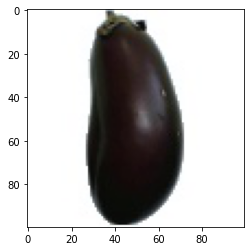

In [116]:
show_example(*dataset[20000])

Label:  Apple Braeburn (0)


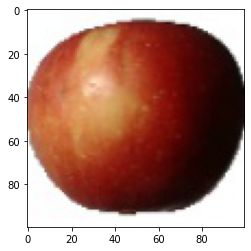

In [117]:
show_example(*dataset[0])

Label:  Cherry Wax Black (29)


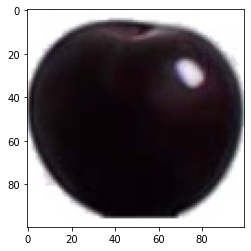

In [118]:
show_example(*dataset[15000])

In [119]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/shwetanshu2000/course-project


<IPython.core.display.Javascript object>

**DATA LOADERS**
Create data loaders for training and validation, to load the data in batches.Create a DataLoader,can split the data into batches of a predefined size while training. It also provides other utilities like shuffling and random sampling of the data.

In [120]:
from torch.utils.data.dataloader import DataLoader

batch_size=128

In [121]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)
test_dl = DataLoader(test, batch_size*2, num_workers=4, pin_memory=True)

Look at batches of images from the dataset using the make_grid method from torchvision. Each time the following code runs, we get a different bach, since the sampler shuffles the indices before creating batches.

In [122]:
for xb, yb in train_dl:
    print("inputs:", xb)
    print("targets:", yb)
    break

inputs: tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]],


        [[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],


In [123]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break       

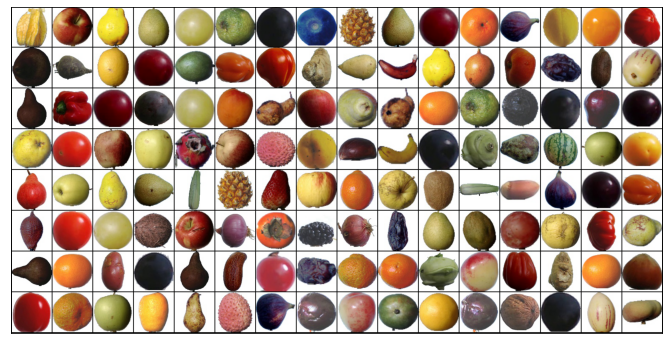

In [124]:
show_batch(train_dl)

In [125]:
jovian.commit(project=project_name, environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/shwetanshu2000/course-project


<IPython.core.display.Javascript object>

# Base Model class & Training on GPU

In [126]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

Define the model by extending an ImageClassificationBase class which contains helper methods for training & validation

In [127]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        

**Same Training loop**

In [128]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval() #enabled the evauation model
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()#u r in training mode
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [129]:
jovian.commit(project=project_name, environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/shwetanshu2000/course-project


<IPython.core.display.Javascript object>

**USE GPU**,some utilities for moving out data & labels to the GPU, if one is available.

In [130]:
torch.cuda.is_available()

True

Defining a helper function to ensure that our code uses the GPU if available, and defaults to using the CPU if it isn't.

In [131]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
device = get_default_device()
device

device(type='cuda')

Define a **DeviceDataLoader** class to wrap our existing data loaders and move data to the selected device, as a batches are accessed. 

Interestingly, we don't need to extend an existing class to create a PyTorch dataloader. All we need is an __iter__ method to retrieve batches of data, and an __len__ method to get the number of batches.

To seamlessly use a GPU, if one is available, we define a couple of helper functions (get_default_device & to_device) and a helper class DeviceDataLoader to move our model & data to the GPU as required

In [132]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

Couple of helper functions for **plotting** the losses & accuracies.

In [133]:
def plot_losses(history):
    losses = [x['val_loss'] for x in history]
    plt.plot(losses, '-x')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Loss vs. No. of epochs');

In [134]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

Now wrap our data loaders using DeviceDataLoader.

In [135]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
test_dl = DeviceDataLoader(test_dl, device)

Setting the parameters for training the model

In [136]:
input_size = 3*100*100
output_size = 131 

# Training the model

In [137]:
class FruitsModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        #Hidden Layer 1
        self.linear1= nn.Linear(input_size, 10000)
        #Hidden Layer 2
        self.linear2= nn.Linear(10000, 2000)
        #Hidden Layer 3
        self.linear3= nn.Linear(2000,500)
        #Hidden Layer 4
        self.linear4= nn.Linear(500,250)
        #Hidden Layer 5
        self.linear5= nn.Linear(250, output_size)
        
    def forward(self, xb):
        # Flatten images into vectors
        out = xb.view(xb.size(0), -1)
        # Apply layers & activation functions to the model
        out= self.linear1(out)
        out=F.relu(out)  
        out=self.linear2(out)
        out=F.relu(out)  
        out=self.linear3(out)
        out=F.relu(out)  
        out=self.linear4(out)
        out=F.relu(out)  
        out=self.linear5(out)
        return out

In [138]:
# Model (on GPU)
model = FruitsModel()
to_device(model, device)

FruitsModel(
  (linear1): Linear(in_features=30000, out_features=10000, bias=True)
  (linear2): Linear(in_features=10000, out_features=2000, bias=True)
  (linear3): Linear(in_features=2000, out_features=500, bias=True)
  (linear4): Linear(in_features=500, out_features=250, bias=True)
  (linear5): Linear(in_features=250, out_features=131, bias=True)
)

In [139]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

In [142]:
history = evaluate(model, val_dl)
history

{'val_loss': 3.341595411300659, 'val_acc': 0.12880858778953552}

Accuracy is not even 1 percent .It means not even 1 image out of 131 is predicted correctly 

In [143]:
history = fit(5, 0.01, model, train_dl, val_dl)

Epoch [0], train_loss: 2.8103, val_loss: 2.3892, val_acc: 0.3222
Epoch [1], train_loss: 1.9324, val_loss: 2.1772, val_acc: 0.3337
Epoch [2], train_loss: 1.4550, val_loss: 1.2028, val_acc: 0.6339
Epoch [3], train_loss: 1.0525, val_loss: 1.3578, val_acc: 0.5584
Epoch [4], train_loss: 0.8233, val_loss: 1.9422, val_acc: 0.4574


In [144]:
history = fit(5, 0.001, model, train_dl, val_dl)

Epoch [0], train_loss: 0.4129, val_loss: 0.3561, val_acc: 0.9069
Epoch [1], train_loss: 0.3337, val_loss: 0.3260, val_acc: 0.9184
Epoch [2], train_loss: 0.3095, val_loss: 0.3058, val_acc: 0.9171
Epoch [3], train_loss: 0.2909, val_loss: 0.2882, val_acc: 0.9264
Epoch [4], train_loss: 0.2748, val_loss: 0.2746, val_acc: 0.9288


In [145]:
import matplotlib.pyplot as plt
%matplotlib inline

Using those predefined helper function for plotting the accuracies and losses 

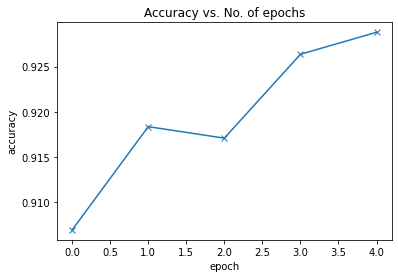

In [146]:
plot_accuracies(history)

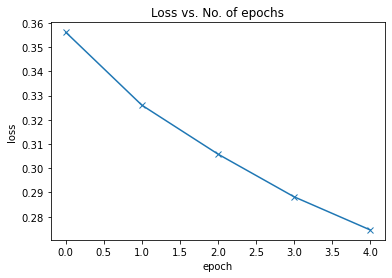

In [148]:
plot_losses(history);

# Thus the validation accuracy rises to 92% after feed forward neural network application

In [149]:
jovian.commit(project=project_name, environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/shwetanshu2000/course-project


<IPython.core.display.Javascript object>

# Using Convolutional Neural Network

In [150]:
def apply_kernel(image, kernel):
    ri, ci = image.shape       # image dimensions
    rk, ck = kernel.shape      # kernel dimensions
    ro, co = ri-rk+1, ci-ck+1  # output dimensions
    output = torch.zeros([ro, co])
    for i in range(ro): 
        for j in range(co):
            output[i,j] = torch.sum(image[i:i+rk,j:j+ck] * kernel)
    return output

In [151]:
sample_image = torch.tensor([
    [3, 3, 2, 1, 0], 
    [0, 0, 1, 3, 1], 
    [3, 1, 2, 2, 3], 
    [2, 0, 0, 2, 2], 
    [2, 0, 0, 0, 1]
], dtype=torch.float32)

sample_kernel = torch.tensor([
    [0, 1, 2], 
    [2, 2, 0], 
    [0, 1, 2]
], dtype=torch.float32)

apply_kernel(sample_image, sample_kernel)

tensor([[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]])

In [152]:
simple_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(2, 2)
)

In [153]:
class FruitsModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 50 x 50

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 25 x 25

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),#output :256*25*25
            nn.MaxPool2d(5, 5), # output: 256 x 5 x 5

            nn.Flatten(), 
            nn.Linear(256*5*5, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 131))
            
        
    def forward(self, xb):
        return self.network(xb)

In [154]:
model = FruitsModel()
model

FruitsModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten()
    (16): Linear(in_features=6400, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_features=1024, out_features=512

In [155]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

In [156]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([128, 3, 100, 100])
out.shape: torch.Size([128, 131])
out[0]: tensor([-0.0240, -0.0004,  0.0136,  0.0375, -0.0181,  0.0316, -0.0211,  0.0235,
        -0.0422,  0.0097,  0.0366,  0.0428,  0.0155,  0.0260, -0.0027,  0.0278,
         0.0310,  0.0092, -0.0301,  0.0131,  0.0131, -0.0187, -0.0280,  0.0118,
         0.0341, -0.0156, -0.0406, -0.0075,  0.0265, -0.0474,  0.0145,  0.0062,
         0.0074, -0.0401, -0.0280, -0.0183,  0.0431,  0.0124,  0.0318,  0.0338,
        -0.0106, -0.0245, -0.0079,  0.0019,  0.0335, -0.0270, -0.0453,  0.0192,
         0.0207, -0.0321,  0.0344,  0.0286,  0.0376, -0.0147,  0.0487, -0.0096,
         0.0158,  0.0268, -0.0197,  0.0212, -0.0337, -0.0342, -0.0101,  0.0168,
         0.0144, -0.0213,  0.0105, -0.0188,  0.0404, -0.0424, -0.0003, -0.0403,
        -0.0056,  0.0488,  0.0099, -0.0329,  0.0075, -0.0305, -0.0182, -0.0320,
         0.0124, -0.0387, -0.0212, -0.0307, -0.0258,  0.0132,  0.0224, -0.0108,
         0.0397, -0.0321,  0.0033

In [157]:
model = to_device(FruitsModel(), device)

In [158]:
evaluate(model, val_dl)

{'val_loss': 4.875669002532959, 'val_acc': 0.007128906436264515}

1. * The initial accuracy is around 0.7%, which is what one might expect from a randomly intialized model (since it has a 1 approx in 131 chance of getting a label right by guessing randomly).

We'll use the following hyperparmeters (learning rate, no. of epochs, batch_size etc.) to train our model. As an exercise, you can try changing these to see if you have achieve a higher accuracy in a shorter time.

In [159]:
num_epochs = 5
opt_func = torch.optim.Adam
lr = 0.001

The optimizer we will use is the Adam optimizer .The Adam optimization algorithm is an extension to stochastic gradient descent 

It's important to record the hyperparameters of every experiment you do, to replicate it later and compare it against other experiments. We can record them using jovian.log_hyperparams.

In [160]:
jovian.reset()
jovian.log_hyperparams({
    'num_epochs': num_epochs,
    'opt_func': opt_func.__name__,
    'batch_size': batch_size,
    'lr': lr,
})

[jovian] Hyperparams logged.


Begin training by training the model

In [161]:
history1 = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 1.9605, val_loss: 0.4388, val_acc: 0.8690
Epoch [1], train_loss: 0.1612, val_loss: 0.1002, val_acc: 0.9693
Epoch [2], train_loss: 0.0635, val_loss: 0.1411, val_acc: 0.9522
Epoch [3], train_loss: 0.0488, val_loss: 0.0115, val_acc: 0.9974
Epoch [4], train_loss: 0.0322, val_loss: 0.0254, val_acc: 0.9929


The accuracy for the model increaded upto 99.74 percentage for the cnn model

Recording the final metrics achieved by the model using jovian.log_metrics for reference, analysis and comparison.

In [162]:
jovian.log_metrics(train_loss=history1[-1]['train_loss'], 
                   val_loss=history1[-1]['val_loss'], 
                   val_acc=history1[-1]['val_acc'])

[jovian] Metrics logged.


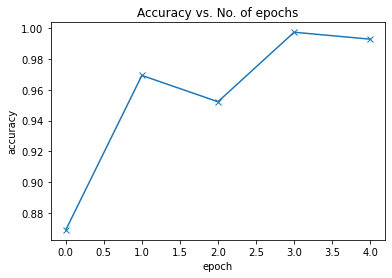

In [163]:
plot_accuracies(history1)

# Our model reaches an accuracy of above 99%.

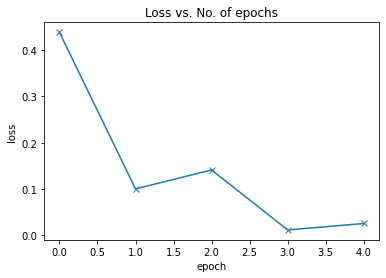

In [164]:
plot_losses(history1)

In [165]:
jovian.commit(project=project_name, environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/shwetanshu2000/course-project


<IPython.core.display.Javascript object>

# Model with Residual Blocks and Batch Normalization

In [179]:
# Data transforms (normalization & data augmentation)
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
train_tfms = tt.Compose([tt.RandomCrop(32, padding=4, padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(), 
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)])
valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)])

In [180]:
# PyTorch datasets
train_ds = ImageFolder(data_dir+'/Training', train_tfms)
valid_ds = ImageFolder(data_dir+'/Test', valid_tfms)

In [181]:
# PyTorch data loaders
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size*2, num_workers=3, pin_memory=True)

In [182]:
batch_size = 256

In [183]:
# PyTorch data loaders
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size*2, num_workers=3, pin_memory=True)

Look at some sample images from the training dataloader.

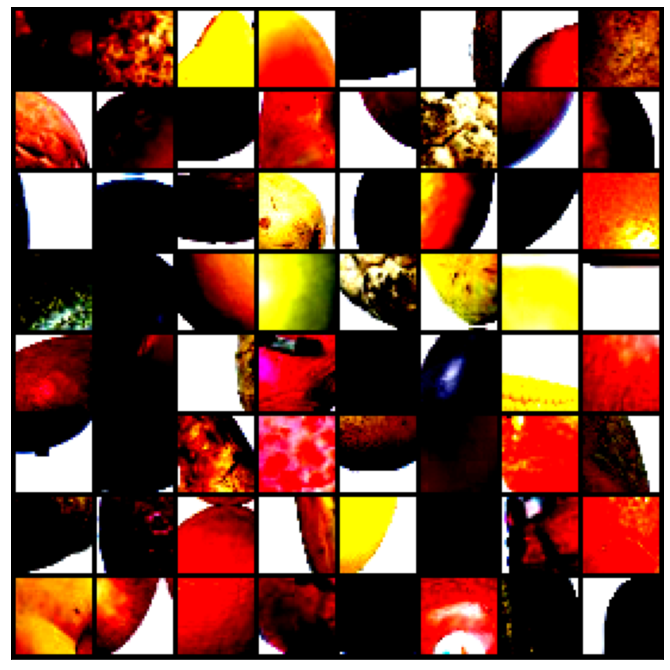

In [184]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0))
        break
show_batch(train_dl)

In [185]:
image, label = dataset[15]
print(image.shape)
len(dataset.classes)
len(valid_ds.classes)

torch.Size([3, 100, 100])


131

# Again using the GPU.

Defining a couple of helper functions (get_default_device & to_device) and a helper class DeviceDataLoader to move our model & data to the GPU as required.

In [186]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [187]:
device = get_default_device()
device

device(type='cuda')

We can now wrap our training and validation data loaders using DeviceDataLoader for automatically transferring batches of data to the GPU (if available).

In [200]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

Here is a very simply **Residual block:**

In [201]:
class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out) + x # ReLU can be applied before or after adding the input

In [202]:
simple_resnet = to_device(SimpleResidualBlock(), device)

for images, labels in train_dl:
    out = simple_resnet(images)
    print(out.shape)
    break
    
del simple_resnet, images, labels
torch.cuda.empty_cache()

torch.Size([256, 3, 32, 32])


In [214]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class Fruits360(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(5), 
                                        nn.Flatten(), 
                                        nn.Linear(2048, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [215]:
model = to_device(Fruits360(3,131), device)
model

Fruits360(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=

In [216]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [217]:
%%time
history2 = [evaluate(model, valid_dl)]
history2

CPU times: user 8.54 s, sys: 5.7 s, total: 14.2 s
Wall time: 29.7 s


[{'val_loss': 4.87628173828125, 'val_acc': 0.0023871527519077063}]

In [ ]:
epochs = 8
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [194]:
jovian.commit(project=project_name, environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/shwetanshu2000/course-project


<IPython.core.display.Javascript object>

In [ ]:
%%time
history2 += fit_one_cycle(epochs, max_lr, model, train_dl, val_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

In [ ]:
plot_accuracies(history2)

In [ ]:
plot_losses(history2)

In [ ]:
plot_lrs(history2)

In [196]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/shwetanshu2000/course-project


<IPython.core.display.Javascript object>

**Changes in Training the model** -Learning rate scheduling,Weight decay,Gradient clipping

Let's define a fit_one_cycle function to incorporate these changes. 

# Testing with individual images

Begin by creating a test dataset using the ImageFolder class.

In [166]:
test_dataset = ImageFolder(data_dir+'/Test', transform=ToTensor())

 Helper function predict_image, which returns the predicted label for a single image tensor

In [167]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: Apple Braeburn , Predicted: Apple Braeburn


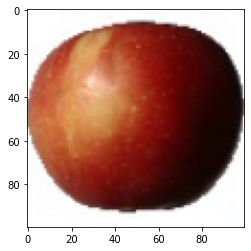

In [168]:
img, label = test_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Apple Red 1 , Predicted: Apple Red 1


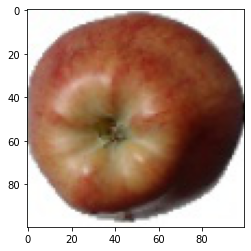

In [169]:
img, label = test_dataset[1223]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Grape Blue , Predicted: Grape Blue


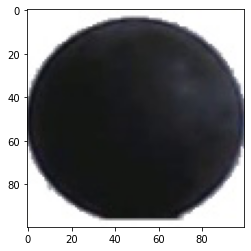

In [170]:
img, label = test_dataset[7632]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Cherry 2 , Predicted: Cherry 2


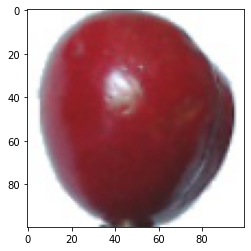

In [171]:
img, label = test_dataset[4454]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Cucumber Ripe 2 , Predicted: Pear Red


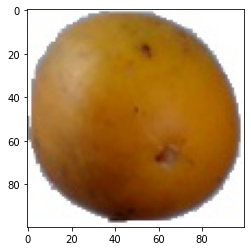

In [172]:
img, label = test_dataset[6454]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Apple Golden 1 , Predicted: Kiwi


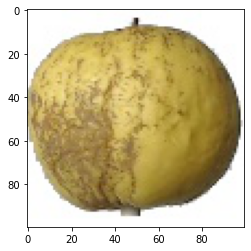

In [197]:
img, label = test_dataset[354]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Identifying where our model performs poorly can help us improve the model, by collecting more training data, increasing/decreasing the complexity of the model, and changing the hypeparameters.

As a final step, let's also look at the overall loss and accuracy of the model on the test set, and record using jovian. We expect these values to be similar to those for the validation set. If not, we might need a better validation set that has similar data and distribution as the test set

In [173]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_loss': 0.5393143892288208, 'val_acc': 0.898648202419281}

In [174]:
jovian.log_metrics(test_loss=result['val_loss'], test_acc=result['val_acc'])

[jovian] Metrics logged.


# Saving and loading the model

In [175]:
torch.save(model.state_dict(), 'course-project.pth')

The .state_dict method returns an OrderedDict containing all the weights and bias matrices mapped to the right attributes of the model. To load the model weights, we can redefine the model with the same structure, and use the .load_state_dict method.

In [176]:
model2 = to_device(FruitsModel(), device)

In [177]:
model2.load_state_dict(torch.load('course-project.pth'))

<All keys matched successfully>

In [178]:
evaluate(model2, test_loader)

{'val_loss': 0.5393143892288208, 'val_acc': 0.898648202419281}

Final Commit using jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/shwetanshu2000/course-project


<IPython.core.display.Javascript object>